# **VLSI 2025 Code-a-Chip Challenge**
## **Automated Flash ADC Layout generator and Optimization**

Author: Utkarsh Sharma - UCLA

utkarshsharma313@gmail.com

## **Introduction**

Analog-to-Digital Converters are the most important part of Analog Front-Ends (AFEs). Layout of ADCs require great care and can also take multiple iterations to meet the desired specifications. This requires a lot of redundant effort and takes the most amount of time in the design process. One important thing to note is that ADCs require only few unique design blocks which are then repeated and connected in a certain topology at the top-level. This presents a big opportunity to realize it as a block level design, where each block is in itself parameterizable. This way a new ADC of N-bits can be designed pretty fast with no layout design rule errors. This notebook tries to show this process by generating layout for an N-bit Flash ADC.

## **Notebook Overview**

This notebook includes:

1) Write scripts to generate block-level design with suitable parameters.

2) Write a top-level script to connect all unique blocks at the top-level to generate a Flash ADC.

3) Simulate ADC to show the achieved performance.



## **Requirements**

To run all the layout generation scripts, tools needed are:

1) Skywater PDK (will also work with GF 180nm PDK)

2) MAGIC for layout extraction

3) Glayout for layout primitives and routing utilities

4) Ngspice for simulations

## **N-bit Flash ADC**
An N-bit Flash ADC broadly comprises of 2^N Comparators and 2^N+1 Resistors. The resistors form a DAC to generate desired references. The input is then compared to these references to determine the quantized value of the input. The output is a thermometric code which is then converted to binary. Flash ADC is chosen here because it has the least number of unique blocks and can be easily paramitrized.

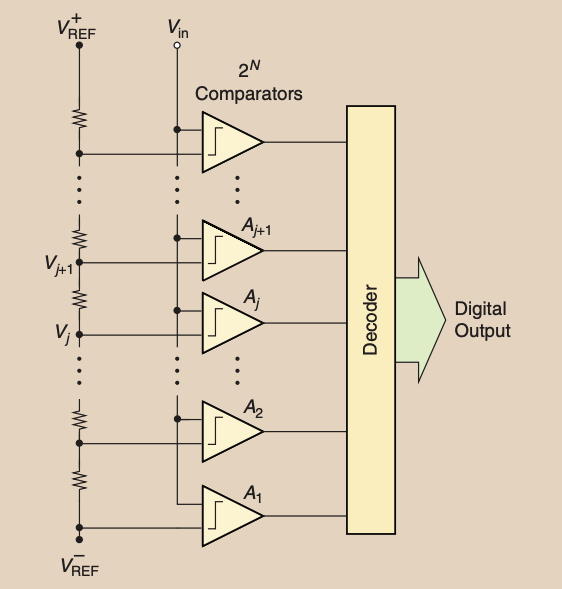

The design process is started by generating a strongARM block. This is then followed by generating the unit-cell of the Flash ADC. It includes sampling capacitor, strongARM comparator and sampling switches.

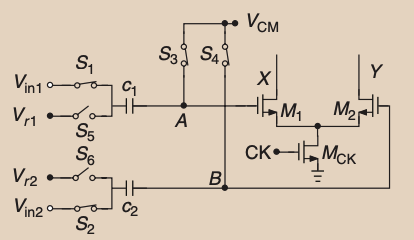

These are then repeated for 2^N times and connected at the top-level to generate the Flash ADC.

## **Tool Installation**


In [7]:
import shutil, os
# Check if the executable exists in $PATH
if shutil.which("magic"):
    print("magic is available in $PATH.")
else:
    # Install magic Layout Editor
    !git clone https://github.com/RTimothyEdwards/magic.git
    %cd /content/magic
    !source ./configure
    #os.system("./configure")
    !make
    !make install
    %cd ../

!git clone https://github.com/RTimothyEdwards/open_pdks
%cd /content/open_pdks
!./configure --enable-sky130-pdk
!make
%cd ./sky130
pdk_dir = os.getcwd()
os.environ['PDK_ROOT'] = pdk_dir
%cd ../../

Streaming output truncated to the last 5000 lines.
Saving contents of cell L1M1_CDNS_524688791851043
Reading "L1M1_CDNS_524688791851041".
Saving contents of cell L1M1_CDNS_524688791851041
Reading "L1M1_CDNS_524688791851040".
Saving contents of cell L1M1_CDNS_524688791851040
Reading "L1M1_CDNS_524688791851038".
Saving contents of cell L1M1_CDNS_524688791851038
Reading "L1M1_CDNS_524688791851037".
Saving contents of cell L1M1_CDNS_524688791851037
Reading "sky130_fd_io__opamp_stage".
Saving contents of cell sky130_fd_io__opamp_stage
Reading "DFL1sd2_CDNS_52468879185113".
Saving contents of cell DFL1sd2_CDNS_52468879185113
Reading "pTran_CDNS_524688791851027".
Saving contents of cell pTran_CDNS_524688791851027
Reading "nfet_CDNS_524688791851025".
Saving contents of cell nfet_CDNS_524688791851025
Reading "PYres_CDNS_524688791851026".
Saving contents of cell PYres_CDNS_524688791851026
Reading "PYL1_CDNS_524688791851009".
Saving contents of cell PYL1_CDNS_524688791851009
Reading "PYL1_CDNS_52

In [8]:
# Setup the environment for the OpenFASOC GDSFactory generator
# You only need to run this block once!
import os

if shutil.which("magic"):
    print("magic is available in $PATH.")

if 'PDK_ROOT' in os.environ:
    print(f"PDK_ROOT is set to: {os.environ['PDK_ROOT']}")


# Clone OpenFASoC
!git clone https://github.com/idea-fasoc/OpenFASOC
# Install python dependencies
!pip install sky130
!pip install gf180 prettyprinttree svgutils
!pip install gdsfactory==7.7.0



magic is available in $PATH.
PDK_ROOT is set to: /content/open_pdks/sky130
Cloning into 'OpenFASOC'...
remote: Enumerating objects: 17313, done.
remote: Counting objects: 100% (3842/3842), done.
remote: Compressing objects: 100% (606/606), done.
remote: Total 17313 (delta 3516), reused 3292 (delta 3235), pack-reused 13471 (from 2)
Receiving objects: 100% (17313/17313), 410.56 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (10635/10635), done.
Updating files: 100% (1862/1862), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 12.7 MB/s et

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: klayout
    Found existing installation: klayout 0.30.0
    Uninstalling klayout-0.30.0:
      Successfully uninstalled klayout-0.30.0
  Attempting uninstall: kfactory
    Found existing installation: kfactory 1.5.2
    Uninstalling kfactory-1.5.2:
      Successfully uninstalled kfactory-1.5.2
  Attempting uninstall: gdsfactory
    Found existing installation: gdsfactory 9.5.5
    Uninstalling gdsfactory-9.5.5:
      Successfully uninstalled gdsfactory-9.5.5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.6 MB/s e

In [1]:
import pathlib


# Install KLayout (via conda)
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}

!bin/micromamba create --yes --prefix $CONDA_PREFIX
# Install from the litex-hub channel
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        klayout

bin/micromamba
env: CONDA_PREFIX=/content/conda-env
Empty environment created at prefix: /content/conda-env
[+] 0.0s
[+] 0.1s
litex-hub/linux-64..  ⣾  
litex-hub/noarch (..  ⣾  
main/linux-64 (che..  ⣾  
main/noarch (check..  ⣾  [+] 0.2s
litex-hub/linux-64..  ⣾  
litex-hub/noarch (..  ⣾  
main/linux-64 (che..  ⣾  
main/noarch (check..  ⣾  [+] 0.3s
litex-hub/linux-64..  ⣾  [+] 0.4s
litex-hub/linux-64..  ⣾  [+] 0.0s
[+] 0.1s
litex-hub/linux-64  ⣾  
litex-hub/noarch    ⣾  
main/linux-64       ⣾  
main/noarch         ⣾  [+] 0.2s
litex-hub/linux-64   2%
litex-hub/noarch    ⣾  
main/linux-64       ⣾  
main/noarch         ⣾  [+] 0.3s
litex-hub/linux-64  81%
litex-hub/noarch    16%
main/linux-64        4%
main/noarch         ⣾  litex-hub/linux-64                                
litex-hub/noarch                                  
[+] 0.4s
main/linux-64  12%
main/noarch     6%[+] 0.5s
main/linux-64  40%
main/noarch    31%main/noarch                                       
[+] 0.6s
main/linux-64  5

In [10]:
# Setup the environment for the OpenFASOC GDSFactory generator

# Adding micro-mamba binary directory to the PATH
# This directory contains Klayout
import pathlib
import os
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
# Add conda packages to the PATH
PATH = os.environ['PATH']
%env PATH={PATH}:{CONDA_PREFIX}/bin

%cd /content/OpenFASOC/openfasoc/generators/glayout

env: CONDA_PREFIX=/content/conda-env
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/conda-env/bin:/content/conda-env/bin:/content/conda-env/bin
/content/OpenFASOC/openfasoc/generators/glayout


## **Script to display gds in-line**

In [9]:
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk as sky130
from glayout.flow.pdk.gf180_mapped  import gf180_mapped_pdk  as gf180
import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output
import ipywidgets as widgets

# Redirect all outputs here
hide = widgets.Output()

# Used to display gds file inline
def display_gds(gds_file, scale = 3):
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg('out.svg')
  # Scale the image for displaying
  fig = sg.fromfile('out.svg')
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save('out.svg')

  # Display the image
  IPython.display.display(IPython.display.SVG('out.svg'))

def display_component(component, scale = 3):
  # Save to a GDS file
  with hide:
    component.write_gds("out.gds")
  display_gds('out.gds', scale)

ModuleNotFoundError: No module named 'glayout'

## **Block-level Design**

1) Differential-Pair

In [6]:
from typing import Optional, Union

from gdsfactory.cell import cell
from gdsfactory.component import Component, copy
from gdsfactory.components.rectangle import rectangle
from gdsfactory.routing.route_quad import route_quad
from gdsfactory.routing.route_sharp import route_sharp
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.pdk.util.comp_utils import align_comp_to_port, evaluate_bbox, movex, movey
from glayout.flow.pdk.util.port_utils import (
    add_ports_perimeter,
    get_orientation,
    print_ports,
    rename_ports_by_list,
    rename_ports_by_orientation,
    set_port_orientation,
)
from glayout.flow.pdk.util.snap_to_grid import component_snap_to_grid
from glayout.flow.placement.common_centroid_ab_ba import common_centroid_ab_ba
from glayout.flow.primitives.fet import nmos, pmos
from glayout.flow.primitives.guardring import tapring
from glayout.flow.primitives.via_gen import via_stack
from glayout.flow.routing.c_route import c_route
from glayout.flow.routing.smart_route import smart_route
from glayout.flow.routing.straight_route import straight_route
from glayout.flow.spice import Netlist


def diff_pair_netlist(fetLtop: Component, fetRtop: Component) -> Netlist:
	diff_pair_netlist = Netlist(circuit_name='DIFF_PAIR', nodes=['VP', 'VN', 'VDD1', 'VDD2', 'VTAIL', 'B'])
	diff_pair_netlist.connect_netlist(
		fetLtop.info['netlist'],
		[('D', 'VDD1'), ('G', 'VP'), ('S', 'VTAIL'), ('B', 'B')]
	)
	diff_pair_netlist.connect_netlist(
		fetRtop.info['netlist'],
		[('D', 'VDD2'), ('G', 'VN'), ('S', 'VTAIL'), ('B', 'B')]
	)
	return diff_pair_netlist

@cell
def diff_pair_mod(
	pdk: MappedPDK,
	width: float = 3,
	fingers: int = 4,
	length: Optional[float] = None,
	n_or_p_fet: bool = True,
	plus_minus_seperation: float = 0,
	rmult: int = 1,
	dummy: Union[bool, tuple[bool, bool]] = True,
	substrate_tap: bool=True
) -> Component:
	"""create a diffpair with 2 transistors placed in two rows with common centroid place. Sources are shorted
	width = width of the transistors
	fingers = number of fingers in the transistors (must be 2 or more)
	length = length of the transistors, None or 0 means use min length
	short_source = if true connects source of both transistors
	n_or_p_fet = if true the diffpair is made of nfets else it is made of pfets
	substrate_tap: if true place a tapring around the diffpair (connects on met1)
	"""
	# TODO: error checking
	pdk.activate()
	diffpair = Component()
	# create transistors
	well = None
	if isinstance(dummy, bool):
		dummy = (dummy, dummy)
	if n_or_p_fet:
		fetL = nmos(pdk, width=width, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(dummy[0], False),with_dnwell=False,with_substrate_tap=False,rmult=rmult)
		fetR = nmos(pdk, width=width, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(False,dummy[1]),with_dnwell=False,with_substrate_tap=False,rmult=rmult)
		fetL2 = nmos(pdk, width=width/2, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(dummy[0], False),with_dnwell=False,with_substrate_tap=False,rmult=rmult)
		fetR2 = nmos(pdk, width=width/2, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(False,dummy[1]),with_dnwell=False,with_substrate_tap=False,rmult=rmult)

		min_spacing_x = pdk.get_grule("n+s/d")["min_separation"] - 2*(fetL.xmax - fetL.ports["multiplier_0_plusdoped_E"].center[0])
		well = "pwell"
	else:
		fetL = pmos(pdk, width=width, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(dummy[0], False),dnwell=False,with_substrate_tap=False,rmult=rmult)
		fetR = pmos(pdk, width=width, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(False,dummy[1]),dnwell=False,with_substrate_tap=False,rmult=rmult)
		fetL2 = pmos(pdk, width=width/2, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(dummy[0], False),with_dnwell=False,with_substrate_tap=False,rmult=rmult)
		fetR2 = pmos(pdk, width=width/2, fingers=fingers,length=length,multipliers=1,with_tie=False,with_dummy=(False,dummy[1]),with_dnwell=False,with_substrate_tap=False,rmult=rmult)

		min_spacing_x = pdk.get_grule("p+s/d")["min_separation"] - 2*(fetL.xmax - fetL.ports["multiplier_0_plusdoped_E"].center[0])
		well = "nwell"
	# place transistors
	viam2m3 = via_stack(pdk,"met2","met3",centered=True)
	metal_min_dim = max(pdk.get_grule("met2")["min_width"],pdk.get_grule("met3")["min_width"])
	metal_space = max(pdk.get_grule("met2")["min_separation"],pdk.get_grule("met3")["min_separation"],metal_min_dim)
	gate_route_os = evaluate_bbox(viam2m3)[0] - fetL.ports["multiplier_0_gate_W"].width + metal_space
	min_spacing_y = metal_space + 2*gate_route_os
	min_spacing_y = min_spacing_y - 2*abs(fetL.ports["well_S"].center[1] - fetL.ports["multiplier_0_gate_S"].center[1])
	# TODO: fix spacing where you see +-0.5
	a_topl = (diffpair << fetL).movey(fetL.ymax+min_spacing_y/2+0.5).movex(0-fetL.xmax-min_spacing_x/2)
	b_topr = (diffpair << fetR).movey(fetR.ymax+min_spacing_y/2+0.5).movex(fetL.xmax+min_spacing_x/2)
	a_botr = (diffpair << fetR)
	a_botr.mirror_y().movey(0-0.5-fetL.ymax-min_spacing_y/2).movex(fetL.xmax+min_spacing_x/2)
	b_botl = (diffpair << fetL)
	b_botl.mirror_y().movey(0-0.5-fetR.ymax-min_spacing_y/2).movex(0-fetL.xmax-min_spacing_x/2)
	# if substrate tap place substrate tap
	if substrate_tap:
		tapref = diffpair << tapring(pdk,evaluate_bbox(diffpair,padding=1),horizontal_glayer="met1")
		diffpair.add_ports(tapref.get_ports_list(),prefix="tap_")
		try:
			diffpair<<straight_route(pdk,a_topl.ports["multiplier_0_dummy_L_gsdcon_top_met_W"],diffpair.ports["tap_W_top_met_W"],glayer2="met1")
		except KeyError:
			pass
		try:
			diffpair<<straight_route(pdk,b_topr.ports["multiplier_0_dummy_R_gsdcon_top_met_W"],diffpair.ports["tap_E_top_met_E"],glayer2="met1")
		except KeyError:
			pass
		try:
			diffpair<<straight_route(pdk,b_botl.ports["multiplier_0_dummy_L_gsdcon_top_met_W"],diffpair.ports["tap_W_top_met_W"],glayer2="met1")
		except KeyError:
			pass
		try:
			diffpair<<straight_route(pdk,a_botr.ports["multiplier_0_dummy_R_gsdcon_top_met_W"],diffpair.ports["tap_E_top_met_E"],glayer2="met1")
		except KeyError:
			pass
	# route sources (short sources)
	diffpair << route_quad(a_topl.ports["multiplier_0_source_E"], b_topr.ports["multiplier_0_source_W"], layer=pdk.get_glayer("met2"))
	diffpair << route_quad(b_botl.ports["multiplier_0_source_E"], a_botr.ports["multiplier_0_source_W"], layer=pdk.get_glayer("met2"))
	sextension = b_topr.ports["well_E"].center[0] - b_topr.ports["multiplier_0_source_E"].center[0]
	source_routeE = diffpair << c_route(pdk, b_topr.ports["multiplier_0_source_E"], a_botr.ports["multiplier_0_source_E"],extension=sextension)
	source_routeW = diffpair << c_route(pdk, a_topl.ports["multiplier_0_source_W"], b_botl.ports["multiplier_0_source_W"],extension=sextension)
	# route drains
	# place via at the drain
	drain_br_via = diffpair << viam2m3
	drain_bl_via = diffpair << viam2m3
	drain_br_via.move(a_botr.ports["multiplier_0_drain_N"].center).movey(viam2m3.ymin)
	drain_bl_via.move(b_botl.ports["multiplier_0_drain_N"].center).movey(viam2m3.ymin)
	drain_br_viatm = diffpair << viam2m3
	drain_bl_viatm = diffpair << viam2m3
	drain_br_viatm.move(a_botr.ports["multiplier_0_drain_N"].center).movey(viam2m3.ymin)
	drain_bl_viatm.move(b_botl.ports["multiplier_0_drain_N"].center).movey(-1.5 * evaluate_bbox(viam2m3)[1] - metal_space)
	# create route to drain via
	width_drain_route = b_topr.ports["multiplier_0_drain_E"].width
	dextension = source_routeE.xmax - b_topr.ports["multiplier_0_drain_E"].center[0] + metal_space
	bottom_extension = viam2m3.ymax + width_drain_route/2 + 2*metal_space
	drain_br_viatm.movey(0-bottom_extension - metal_space - width_drain_route/2 - viam2m3.ymax)
	diffpair << route_quad(drain_br_viatm.ports["top_met_N"], drain_br_via.ports["top_met_S"], layer=pdk.get_glayer("met3"))
	diffpair << route_quad(drain_bl_viatm.ports["top_met_N"], drain_bl_via.ports["top_met_S"], layer=pdk.get_glayer("met3"))
	floating_port_drain_bottom_L = set_port_orientation(movey(drain_bl_via.ports["bottom_met_W"],0-bottom_extension), get_orientation("E"))
	floating_port_drain_bottom_R = set_port_orientation(movey(drain_br_via.ports["bottom_met_E"],0-bottom_extension - metal_space - width_drain_route), get_orientation("W"))
	drain_routeTR_BL = diffpair << c_route(pdk, floating_port_drain_bottom_L, b_topr.ports["multiplier_0_drain_E"],extension=dextension, width1=width_drain_route,width2=width_drain_route)
	drain_routeTL_BR = diffpair << c_route(pdk, floating_port_drain_bottom_R, a_topl.ports["multiplier_0_drain_W"],extension=dextension, width1=width_drain_route,width2=width_drain_route)
	# cross gate route top with c_route. bar_minus ABOVE bar_plus
	get_left_extension = lambda bar, a_topl=a_topl, diffpair=diffpair, pdk=pdk : (abs(diffpair.xmin-min(a_topl.ports["multiplier_0_gate_W"].center[0],bar.ports["e1"].center[0])) + pdk.get_grule("met2")["min_separation"])
	get_right_extension = lambda bar, b_topr=b_topr, diffpair=diffpair, pdk=pdk : (abs(diffpair.xmax-max(b_topr.ports["multiplier_0_gate_E"].center[0],bar.ports["e3"].center[0])) + pdk.get_grule("met2")["min_separation"])
	# lay bar plus and PLUSgate_routeW
	bar_comp = rectangle(centered=True,size=(abs(b_topr.xmax-a_topl.xmin), b_topr.ports["multiplier_0_gate_E"].width),layer=pdk.get_glayer("met2"))
	bar_plus = (diffpair << bar_comp).movey(diffpair.ymax + bar_comp.ymax + pdk.get_grule("met2")["min_separation"])
	PLUSgate_routeW = diffpair << c_route(pdk, a_topl.ports["multiplier_0_gate_W"], bar_plus.ports["e1"], extension=get_left_extension(bar_plus))
	# lay bar minus and MINUSgate_routeE
	plus_minus_seperation = max(pdk.get_grule("met2")["min_separation"], plus_minus_seperation)
	bar_minus = (diffpair << bar_comp).movey(diffpair.ymax +bar_comp.ymax + plus_minus_seperation)
	MINUSgate_routeE = diffpair << c_route(pdk, b_topr.ports["multiplier_0_gate_E"], bar_minus.ports["e3"], extension=get_right_extension(bar_minus))
	# lay MINUSgate_routeW and PLUSgate_routeE
	MINUSgate_routeW = diffpair << c_route(pdk, set_port_orientation(b_botl.ports["multiplier_0_gate_E"],"W"), bar_minus.ports["e1"], extension=get_left_extension(bar_minus))
	PLUSgate_routeE = diffpair << c_route(pdk, set_port_orientation(a_botr.ports["multiplier_0_gate_W"],"E"), bar_plus.ports["e3"], extension=get_right_extension(bar_plus))
	# correct pwell place, add ports, flatten, and return
	diffpair.add_ports(a_topl.get_ports_list(),prefix="tl_")
	diffpair.add_ports(b_topr.get_ports_list(),prefix="tr_")
	diffpair.add_ports(b_botl.get_ports_list(),prefix="bl_")
	diffpair.add_ports(a_botr.get_ports_list(),prefix="br_")
	diffpair.add_ports(source_routeE.get_ports_list(),prefix="source_routeE_")
	diffpair.add_ports(source_routeW.get_ports_list(),prefix="source_routeW_")
	diffpair.add_ports(drain_routeTR_BL.get_ports_list(),prefix="drain_routeTR_BL_")
	diffpair.add_ports(drain_routeTL_BR.get_ports_list(),prefix="drain_routeTL_BR_")
	diffpair.add_ports(MINUSgate_routeW.get_ports_list(),prefix="MINUSgateroute_W_")
	diffpair.add_ports(MINUSgate_routeE.get_ports_list(),prefix="MINUSgateroute_E_")
	diffpair.add_ports(PLUSgate_routeW.get_ports_list(),prefix="PLUSgateroute_W_")
	diffpair.add_ports(PLUSgate_routeE.get_ports_list(),prefix="PLUSgateroute_E_")
	diffpair.add_padding(layers=(pdk.get_glayer(well),), default=0)

	component = component_snap_to_grid(rename_ports_by_orientation(diffpair))

	component.info['netlist'] = diff_pair_netlist(fetL, fetR)
	return component

In [7]:
# 4 transistor placed in two rows (each row is an interdigitized pair of transistors)
# the 4 transistors are labeled top or bottom and transistor A or B
# top_A_, bottom_A, top_B_, bottom_B_

from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.placement.two_transistor_interdigitized import two_nfet_interdigitized, two_pfet_interdigitized
from typing import Literal, Optional
from gdsfactory import Component
from glayout.flow.pdk.util.comp_utils import evaluate_bbox, movey
from glayout.flow.primitives.guardring import tapring

def generic_4T_interdigitzed_mod(
    pdk: MappedPDK,
    top_row_device: Literal["nfet", "pfet"],
    bottom_row_device: Literal["nfet", "pfet"],
    numcols: int,
    length: float=None,
    with_substrate_tap: bool = True,
    top_kwargs: Optional[dict]=None,
    bottom_kwargs: Optional[dict]=None
):
    if top_kwargs is None:
        top_kwargs = dict()
    if bottom_kwargs is None:
        bottom_kwargs = dict()
    # place
    toplvl = Component()
    if top_row_device=="nfet":
        toprow = toplvl << two_nfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**top_kwargs)
    else:
        toprow = toplvl << two_pfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**top_kwargs)
    if bottom_row_device=="nfet":
        bottomrow = toplvl << two_nfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**bottom_kwargs)
    else:
        bottomrow = toplvl << two_pfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**bottom_kwargs)
    # move
    toprow.movey(pdk.snap_to_2xgrid((evaluate_bbox(bottomrow)[1]/2 + evaluate_bbox(toprow)[1]/2 + pdk.util_max_metal_seperation())))
    # add substrate tap
    if with_substrate_tap:
        substrate_tap = tapring(pdk, enclosed_rectangle=pdk.snap_to_2xgrid(evaluate_bbox(toplvl.flatten(),padding=pdk.util_max_metal_seperation())))
        substrate_tap_ref = toplvl << movey(substrate_tap,destination=pdk.snap_to_2xgrid(toplvl.flatten().center[1],snap4=True))
        toplvl.add_ports(substrate_tap_ref.get_ports_list(),prefix="substratetap_")

    # add ports

    toplvl.add_ports(toprow.get_ports_list(),prefix="top_")
    toplvl.add_ports(bottomrow.get_ports_list(),prefix="bottom_")
    # flag for smart route
    toplvl.info["route_genid"] = "four_transistor_interdigitized"
    return toplvl


## **Cross-coupled load for strongARM**

In [8]:
from gdsfactory.components import rectangle
from gdsfactory import Component
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.primitives.fet import nmos, pmos
from glayout.flow.placement.two_transistor_interdigitized import two_pfet_interdigitized
#from four_transistor_interdigitized import generic_4T_interdigitzed
from glayout.flow.pdk.util.comp_utils import prec_ref_center
from glayout.flow.routing.smart_route import smart_route, c_route, straight_route, L_route
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk
from glayout.flow.spice import Netlist
from glayout.flow.primitives.guardring import tapring
from glayout.flow.primitives.via_gen import via_stack, via_array

def x_coupled_netlist(nfetA: Component, nfetB: Component, pfetA: Component, pfetB: Component, nfetdum: Component, pfetdum: Component):
    x_coupled_netlist = Netlist(circuit_name ='cross_cpoupled_load', nodes=['VSN1', 'VSN2', 'VSP1', 'VSP2', 'VO1', 'VO2', 'VBULKN', 'VBULKP'])
    x_coupled_netlist.connect_netlist(
        nfetA.info['netlist'],
        [('G','VO1'), ('D','VO2'), ('S','VSN1'), ('B','VBULKN')]
    )
    x_coupled_netlist.connect_netlist(
        nfetdum.info['netlist'],
        [('G','VBULKN'), ('D','VBULKN'), ('S','VBULKN'), ('B','VBULKN')]
    )
    x_coupled_netlist.connect_netlist(
        pfetdum.info['netlist'],
        [('G','VBULKP'), ('D','VBULKP'), ('S','VBULKP'), ('B','VBULKP')]
    )
    x_coupled_netlist.connect_netlist(
        nfetB.info['netlist'],
        [('G','VO2'), ('D','VO1'), ('S','VSN2'), ('B','VBULKN')]
    )
    x_coupled_netlist.connect_netlist(
        pfetA.info['netlist'],
        [('G','VO1'), ('D','VO2'), ('S','VSP1'), ('B','VBULKP')]
    )
    x_coupled_netlist.connect_netlist(
        pfetB.info['netlist'],
        [('G','VO2'), ('D','VO1'), ('S','VSP2'), ('B','VBULKP')]
    )
    return x_coupled_netlist

def cross_coupled_load(pdk: MappedPDK, ccinv_col, length, pmos_width, nmos_width):
    cross_coupled_load=Component(name="cross_coupled_load")
    cross_couple = generic_4T_interdigitzed_mod(pdk, numcols=ccinv_col, top_row_device="pfet", bottom_row_device="nfet", length=length, with_substrate_tap = False, top_kwargs = {"width":pmos_width}, bottom_kwargs = {"width":nmos_width})
    cross_couple_ref = prec_ref_center(cross_couple)
    cross_coupled_load.add(cross_couple_ref)
    cross_coupled_load.add_ports(cross_couple_ref.get_ports_list(), prefix="cross_couple_")
    cross_coupled_load << smart_route(pdk,cross_coupled_load.ports["cross_couple_top_A_source_E"],cross_coupled_load.ports["cross_couple_top_B_source_E"],cross_couple_ref,cross_coupled_load)
    ref1 = cross_coupled_load << c_route(pdk,cross_coupled_load.ports["cross_couple_top_A_drain_E"],cross_coupled_load.ports["cross_couple_top_B_gate_E"])
    ref2 = cross_coupled_load << c_route(pdk,cross_coupled_load.ports["cross_couple_bottom_A_drain_E"],cross_coupled_load.ports["cross_couple_bottom_B_gate_E"])
    cross_coupled_load.add_ports(ref1.get_ports_list(), prefix="ref1_")
    cross_coupled_load.add_ports(ref2.get_ports_list(), prefix="ref2_")
    lef1 = cross_coupled_load << c_route(pdk,cross_coupled_load.ports["cross_couple_top_B_drain_W"],cross_coupled_load.ports["cross_couple_top_A_gate_W"])
    lef2 = cross_coupled_load << c_route(pdk,cross_coupled_load.ports["cross_couple_bottom_B_drain_W"],cross_coupled_load.ports["cross_couple_bottom_A_gate_W"])
    cross_coupled_load.add_ports(lef1.get_ports_list(), prefix="lef1_")
    cross_coupled_load.add_ports(lef2.get_ports_list(), prefix="lef2_")
    #cross_coupled_load << c_route(pdk,cross_coupled_load.ports["cross_couple_top_B_gate_E"],cross_coupled_load.ports["cross_couple_bottom_A_drain_E"])
    #cross_coupled_load << c_route(pdk,cross_coupled_load.ports["cross_couple_top_A_gate_W"],cross_coupled_load.ports["cross_couple_bottom_B_drain_W"])
    #print(ref1.get_ports_list())
    cross_coupled_load << straight_route(pdk,cross_coupled_load.ports["ref1_con_S"],cross_coupled_load.ports["ref2_con_N"])
    cross_coupled_load << straight_route(pdk,cross_coupled_load.ports["ref1_con_S"],cross_coupled_load.ports["ref2_con_N"])
    cross_coupled_load << straight_route(pdk,cross_coupled_load.ports["lef1_con_S"],cross_coupled_load.ports["lef2_con_N"])
    cross_coupled_load << straight_route(pdk,cross_coupled_load.ports["lef1_con_S"],cross_coupled_load.ports["lef2_con_N"])

    nfetA = nmos(pdk, width=nmos_width*ccinv_col, length=length, with_dummy=(False, False))
    nfetB = nmos(pdk, width=nmos_width*ccinv_col, length=length, with_dummy=(False, False))
    pfetA = pmos(pdk, width=pmos_width*ccinv_col, length=length, with_dummy=(False, False))
    pfetB = pmos(pdk, width=pmos_width*ccinv_col, length=length, with_dummy=(False, False))
    nfetdum = nmos(pdk, width=nmos_width*2, length=length, with_dummy=(False, False))
    pfetdum = pmos(pdk, width=pmos_width*2, length=length, with_dummy=(False, False))
    cross_coupled_load.info['netlist'] = x_coupled_netlist(nfetA, nfetB, pfetA, pfetB, nfetdum, pfetdum)
    return cross_coupled_load


def add_x_coupled_labels(x_coupled: Component):
    x_coupled.unlock()
    met1_label = (68, 5)
    met1_pin = (68, 16)
    move_info = list()
    #vo1 label
    vo1label = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vo1label.add_label(text="VO1",layer=met1_label)
    move_info.append((vo1label,x_coupled.ports["cross_couple_top_B_drain_N"],None))
    #vo2 label
    vo2label = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vo2label.add_label(text="VO2",layer=met1_label)
    move_info.append((vo2label,x_coupled.ports["cross_couple_top_A_drain_N"],None))
    #vsn1 label
    vsn1label = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vsn1label.add_label(text="VSN1",layer=met1_label)
    move_info.append((vsn1label,x_coupled.ports["cross_couple_bottom_A_source_N"],None))
    #vsn2 label
    vsn2label = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vsn2label.add_label(text="VSN2",layer=met1_label)
    move_info.append((vsn2label,x_coupled.ports["cross_couple_bottom_B_source_N"],None))
    #vsp1 label
    vsp1label = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vsp1label.add_label(text="VSP1",layer=met1_label)
    move_info.append((vsp1label,x_coupled.ports["cross_couple_top_A_source_N"],None))
    #vsp2 label
    vsp2label = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vsp2label.add_label(text="VSP2",layer=met1_label)
    move_info.append((vsp2label,x_coupled.ports["cross_couple_top_B_source_N"],None))
    #vbulk label
    vbulknlabel = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vbulknlabel.add_label(text="VBULKN",layer=met1_label)
    move_info.append((vbulknlabel,x_coupled.ports["cross_couple_bottom_welltie_N_top_met_N"],None))
    #vbulk label
    vbulkplabel = rectangle(layer=met1_pin, size=(0.05,0.05), centered=True).copy()
    vbulkplabel.add_label(text="VBULKP",layer=met1_label)
    move_info.append((vbulkplabel,x_coupled.ports["cross_couple_top_welltie_N_top_met_N"],None))
    #move everything to position
    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        x_coupled.add(compref)
    return x_coupled.flatten()

## **StrongARM Layout**

Each of the transistors are parametrizable. The values can be changed by setting the variables:

**differential pair**

diffp_w, diffp_fi, diffp_l

**cross_coupled inverter columns**

ccinvs_col, ccinv_length, ccinv_nmos_width, ccinv_pmos_width

**clock nmos fingers**


clknmos_fig, clk_nmos_width, clk_nmos_length

**reset pmos**

resetp_w, resetp_l, reset_pmos_fingers

2025-04-30 02:31:35.368 | WARNING  | gdsfactory.pdk:get_active_pdk:733 - No active PDK. Activating generic PDK.

2025-04-30 02:31:37.261 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: '/usr/local/lib/python3.11/dist-packages/gdsfactory/generic_tech/layer_views.yaml'.
2025-04-30 02:31:37.266 | INFO     | gdsfactory.pdk:activate:337 - 'generic' PDK is now active
2025-04-30 02:31:37.297 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
<ipython-input-9-cdb784dd3ce5>:272: UserWarning: Unnamed cells, 1 in 'Unnamed_6e7c645b'
  strong.write_gds("./mystrongARM.gds")
2025-04-30 02:32:57.121 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'mystrongARM.gds'


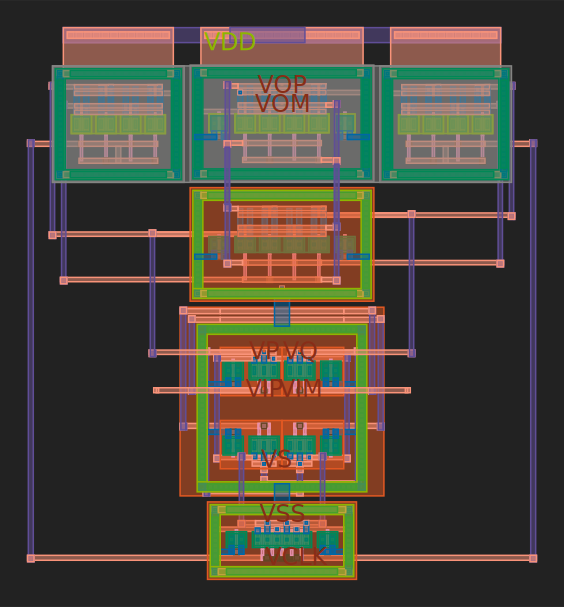

In [9]:
import numpy as np
np.float_ = np.float64


from gdsfactory.components import rectangle
from gdsfactory import Component
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.primitives.fet import nmos, pmos
from glayout.flow.placement.two_transistor_interdigitized import two_pfet_interdigitized
from glayout.flow.placement.four_transistor_interdigitized import generic_4T_interdigitzed
from glayout.flow.placement.two_transistor_interdigitized import two_nfet_interdigitized
from glayout.flow.pdk.util.comp_utils import prec_ref_center, movey, evaluate_bbox, movex, align_comp_to_port
from glayout.flow.routing.smart_route import smart_route, c_route, straight_route, L_route
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk
from glayout.flow.spice import Netlist
from glayout.flow.primitives.guardring import tapring
from glayout.flow.primitives.via_gen import via_stack, via_array
#from glayout.flow.blocks.diff_pair import *
#from diff_pair import *
#from cross_coupled_load import *

import os

def mystrongARM_netlist(diffpair: Component, cross_couple: Component, nfet_clk: Component, nfet_clk_dum: Component, pfetA: Component, pfetB: Component, pfetC: Component, pfetD: Component):
    mystrongARM_netlist = Netlist(circuit_name ='strongARM', nodes=['VIP', 'VIM', 'VOP', 'VOM', 'VCLK', 'VDD', 'VSS', 'VP', 'VQ', 'VS'])
    mystrongARM_netlist.connect_netlist(
        diffpair.info['netlist'],
        [('VP','VIP'), ('VN','VIM'), ('VDD1','VP'), ('VDD2','VQ'), ('VTAIL','VS'), ('B','VSS')]
    )
    mystrongARM_netlist.connect_netlist(
        cross_couple.info['netlist'],
        [('VSN1','VP'), ('VSN2','VQ'), ('VSP1','VDD'), ('VSP2','VDD'), ('VO1','VOP'), ('VO2','VOM'), ('VBULKN','VSS'), ('VBULKP','VDD')]
    )
    #mystrongARM_netlist.connect_netlist(
    #    clk_nmos.info['netlist'],
    #    [('G','VCLK'), ('S','VSS'), ('D','VS'), ('B','VSS')]
    #)
    mystrongARM_netlist.connect_netlist(
        nfet_clk.info['netlist'],
        [('G','VCLK'), ('S','VSS'), ('D','VS'), ('B','VSS')]
    )
    mystrongARM_netlist.connect_netlist(
        nfet_clk_dum.info['netlist'],
        [('G','VSS'), ('S','VSS'), ('D','VSS'), ('B','VSS')]
    )
    mystrongARM_netlist.connect_netlist(
        pfetA.info['netlist'],
        [('G','VCLK'), ('S','VDD'), ('D','VOP'), ('B','VDD')]
    )
    mystrongARM_netlist.connect_netlist(
        pfetB.info['netlist'],
        [('G','VCLK'), ('S','VDD'), ('D','VOM'), ('B','VDD')]
    )
    mystrongARM_netlist.connect_netlist(
        pfetC.info['netlist'],
        [('G','VCLK'), ('S','VDD'), ('D','VP'), ('B','VDD')]
    )
    mystrongARM_netlist.connect_netlist(
        pfetD.info['netlist'],
        [('G','VCLK'), ('S','VDD'), ('D','VQ'), ('B','VDD')]
    )
    return mystrongARM_netlist
def mystrongARM(pdk: MappedPDK, diffp_w, diffp_fi, diffp_l, ccinv_col, ccinv_length, ccinv_pmos_width, ccinv_nmos_width, clk_fing, clk_nmos_width, clk_nmos_length, reset_w, reset_l, reset_pmos_fingers):
    mystrongARM=Component(name="mystrongARM")
    diffp = diff_pair_mod(pdk, diffp_w, diffp_fi, diffp_l)
    diffp_ref = prec_ref_center(diffp)
    mystrongARM.add(diffp_ref)

    #print(diffp.info['netlist'].generate_netlist())

    cross_couple = cross_coupled_load(pdk, ccinv_col, ccinv_length, ccinv_pmos_width, ccinv_nmos_width)
    cross_couple_ref = prec_ref_center(cross_couple)
    mystrongARM.add(cross_couple_ref)


    clk_nmos = nmos(pdk, width=clk_nmos_width, fingers=clk_fing,rmult=1, length = clk_nmos_length, with_substrate_tap=False, with_dnwell=False)
    clk_nmos_ref = prec_ref_center(clk_nmos)
    mystrongARM.add(clk_nmos_ref)

    reset_pmos_right = two_pfet_interdigitized(pdk, numcols=reset_pmos_fingers, dummy=False, with_substrate_tap=False, with_tie=True, width=reset_w, length=reset_l, rmult=1)
    reset_pmos_ref1 = prec_ref_center(reset_pmos_right)
    mystrongARM.add(reset_pmos_ref1)
    offsety_reset_pmos=evaluate_bbox(cross_couple)[1]/4

    reset_pmos_left = two_pfet_interdigitized(pdk, numcols=reset_pmos_fingers, dummy=False, with_substrate_tap=False, with_tie=True, width=reset_w, length=reset_l, rmult=1)
    reset_pmos_ref2 = prec_ref_center(reset_pmos_left)
    mystrongARM.add(reset_pmos_ref2)
    offsetx_cross = (evaluate_bbox(cross_couple)[0]-evaluate_bbox(reset_pmos_left)[0])/2

    offsety_diffp = (evaluate_bbox(diffp)[1]-evaluate_bbox(clk_nmos)[1])/2
    offsety_cross = (evaluate_bbox(cross_couple)[1]-evaluate_bbox(diffp)[1])/2

    movey(reset_pmos_ref2, evaluate_bbox(clk_nmos_ref)[1]+pdk.util_max_metal_seperation() + offsety_diffp + evaluate_bbox(diffp)[1]+pdk.util_max_metal_seperation() + offsety_cross+offsety_reset_pmos)
    movex(cross_couple_ref, evaluate_bbox(reset_pmos_left)[0]+pdk.util_max_metal_seperation()+offsetx_cross)
    movex(diffp_ref, evaluate_bbox(reset_pmos_left)[0]+pdk.util_max_metal_seperation()+offsetx_cross)
    movex(clk_nmos_ref, evaluate_bbox(reset_pmos_left)[0]+pdk.util_max_metal_seperation()+offsetx_cross)
    movey(cross_couple_ref, evaluate_bbox(clk_nmos_ref)[1]+pdk.util_max_metal_seperation() + offsety_diffp + evaluate_bbox(diffp)[1]+pdk.util_max_metal_seperation() + offsety_cross)
    movey(diffp_ref, evaluate_bbox(clk_nmos_ref)[1]+pdk.util_max_metal_seperation()+offsety_diffp)
    movey(reset_pmos_ref1, evaluate_bbox(clk_nmos_ref)[1]+pdk.util_max_metal_seperation() + offsety_diffp + evaluate_bbox(diffp)[1]+pdk.util_max_metal_seperation() + offsety_cross + offsety_reset_pmos)
    movex(reset_pmos_ref1, evaluate_bbox(reset_pmos_left)[0]+pdk.util_max_metal_seperation() + evaluate_bbox(cross_couple)[0]+pdk.util_max_metal_seperation())
    nwell_length = evaluate_bbox(reset_pmos_left)[1]
    nwell_width = evaluate_bbox(reset_pmos_left)[0] + evaluate_bbox(cross_couple_ref)[0] + evaluate_bbox(reset_pmos_right)[0]
    nwell_offset = (evaluate_bbox(cross_couple_ref)[0] + evaluate_bbox(reset_pmos_right)[0])/2
    nwell_box = rectangle(size=(nwell_width,nwell_length),layer=pdk.get_glayer("nwell"))
    nwell_box_ref = prec_ref_center(nwell_box)
    mystrongARM.add(nwell_box_ref)
    movey(nwell_box_ref, evaluate_bbox(clk_nmos_ref)[1]+pdk.util_max_metal_seperation() + offsety_diffp + evaluate_bbox(diffp)[1]+pdk.util_max_metal_seperation() + offsety_cross+offsety_reset_pmos)
    movex(nwell_box_ref, nwell_offset)
    #print(diffp_ref.get_ports_list())
    mystrongARM.add_ports(diffp_ref.get_ports_list(), prefix="strongARM_diffp_")
    mystrongARM.add_ports(cross_couple_ref.get_ports_list(), prefix="strongARM_")
    mystrongARM.add_ports(clk_nmos_ref.get_ports_list(), prefix="strongARM_clk_nmos_")
    mystrongARM.add_ports(reset_pmos_ref1.get_ports_list(), prefix="strongARM_clk_reset_pmos_r_")
    mystrongARM.add_ports(reset_pmos_ref2.get_ports_list(), prefix="strongARM_clk_reset_pmos_l_")

    mystrongARM << c_route(pdk, mystrongARM.ports["strongARM_diffp_tl_drain_W"], mystrongARM.ports["strongARM_cross_couple_bottom_A_source_W"], extension = 5.5)
    mystrongARM << c_route(pdk, mystrongARM.ports["strongARM_diffp_tr_drain_E"], mystrongARM.ports["strongARM_cross_couple_bottom_B_source_E"], extension = 5.5)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_diffp_bl_source_W"], mystrongARM.ports["strongARM_clk_nmos_drain_W"], clk_nmos_ref, mystrongARM)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_diffp_br_source_E"], mystrongARM.ports["strongARM_clk_nmos_drain_E"], clk_nmos_ref, mystrongARM)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_A_source_E"], mystrongARM.ports["strongARM_clk_reset_pmos_r_B_source_E"],reset_pmos_ref1,mystrongARM)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_A_source_E"], mystrongARM.ports["strongARM_clk_reset_pmos_l_B_source_E"],reset_pmos_ref2,mystrongARM)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_A_drain_E"], mystrongARM.ports["strongARM_cross_couple_bottom_A_gate_E"])
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_B_drain_E"], mystrongARM.ports["strongARM_cross_couple_bottom_B_source_E"], extension = 1.25)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_A_drain_W"], mystrongARM.ports["strongARM_cross_couple_bottom_B_gate_W"])
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_B_drain_W"], mystrongARM.ports["strongARM_cross_couple_bottom_A_source_W"], extension = 1.25)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_A_gate_W"], mystrongARM.ports["strongARM_clk_reset_pmos_r_B_gate_W"],reset_pmos_ref1,mystrongARM)
    mystrongARM << smart_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_A_gate_E"], mystrongARM.ports["strongARM_clk_reset_pmos_l_B_gate_E"],reset_pmos_ref2,mystrongARM)

    mystrongARM << c_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_A_gate_E"], mystrongARM.ports["strongARM_clk_nmos_gate_E"], extension = 3)
    mystrongARM << c_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_A_gate_W"], mystrongARM.ports["strongARM_clk_nmos_gate_W"], extension = 3)

    #mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_B_source_N"], mystrongARM.ports["strongARM_clk_reset_pmos_l_welltie_N_top_met_S"], width = 1,glayer1="met3",fullbottom=False)
    #mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_B_source_N"], mystrongARM.ports["strongARM_clk_reset_pmos_r_welltie_N_top_met_S"], width = 1,glayer1="met3",fullbottom=False)
    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_l_B_source_E"], mystrongARM.ports["strongARM_clk_reset_pmos_l_welltie_E_top_met_W"],glayer1="met2",fullbottom=False)
    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_clk_reset_pmos_r_B_source_W"], mystrongARM.ports["strongARM_clk_reset_pmos_r_welltie_W_top_met_E"],glayer1="met2",fullbottom=False)


    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_cross_couple_top_A_source_E"], mystrongARM.ports["strongARM_cross_couple_top_welltie_W_top_met_W"],glayer1="met2",fullbottom=True)
    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_cross_couple_top_B_source_W"], mystrongARM.ports["strongARM_cross_couple_top_welltie_E_top_met_E"],glayer1="met2",fullbottom=True)
    #Extension on input port
    trace_l = []
    trace = evaluate_bbox(diffp_ref)[0]/2
    trace_l.append(- evaluate_bbox(diffp_ref)[0]/2 + trace/2)
    trace_l.append(evaluate_bbox(diffp_ref)[0]/2 - trace/2)
    vinp = rectangle(layer=(68,20), size=(trace,0.33), centered = True).copy()
    vinp1 = rectangle(layer=(68,20), size=(0.33,0.33), centered = True).copy()
    compref = align_comp_to_port(vinp, mystrongARM.ports["strongARM_diffp_tl_gate_W"], alignment=('c','b'))
    movex(compref, trace_l[0])
    mystrongARM.add(compref)
    compref = align_comp_to_port(vinp1, mystrongARM.ports["strongARM_diffp_tl_gate_W"], alignment=('c','b'))
    movex(compref, trace_l[0] - trace/2)
    mystrongARM.add_ports(compref.get_ports_list(), prefix="strongARM_diffp_gate_p_extension_")
    mystrongARM.add(compref)

    vinm = rectangle(layer=(68,20), size=(trace,0.33), centered = True).copy()
    vinm1 = rectangle(layer=(68,20), size=(0.33,0.33), centered = True).copy()
    compref = align_comp_to_port(vinm, mystrongARM.ports["strongARM_diffp_tr_gate_E"], alignment=('c','b'))
    movex(compref, trace_l[1])
    mystrongARM.add(compref)
    compref = align_comp_to_port(vinm1, mystrongARM.ports["strongARM_diffp_tr_gate_E"], alignment=('c','b'))

    movex(compref, trace_l[1] + trace/2)
    mystrongARM.add_ports(compref.get_ports_list(), prefix="strongARM_diffp_gate_m_extension_")
    mystrongARM.add(compref)



    #Gnd tap connections
    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_clk_nmos_source_E"], mystrongARM.ports["strongARM_clk_nmos_tie_E_top_met_W"])
    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_clk_nmos_source_W"], mystrongARM.ports["strongARM_clk_nmos_tie_W_top_met_E"])
    mystrongARM << straight_route(pdk,  mystrongARM.ports["strongARM_diffp_tap_S_top_met_N"] ,mystrongARM.ports["strongARM_clk_nmos_tie_N_top_met_S"] ,width=1, glayer1="met1")
    mystrongARM << straight_route(pdk, mystrongARM.ports["strongARM_diffp_tap_N_top_met_N"] ,mystrongARM.ports["strongARM_cross_couple_bottom_welltie_S_top_met_N"], width=1,glayer1="met1",fullbottom=True)

    vddpin = mystrongARM << rectangle(size=(5,1),layer=pdk.get_glayer("met3"),centered=True)
    vddpin.movey(mystrongARM.ymax + 2)
    vddpin.movex((mystrongARM.xmax)/2 - 4)
    #print(vddpin.get_ports_list())
    mystrongARM.add_ports(vddpin.get_ports_list(), prefix="strongARM_Vdd_pin_")
    #Vdd connections
    mystrongARM << L_route(pdk, vddpin.ports["e1"] ,mystrongARM.ports["strongARM_cross_couple_top_welltie_N_top_met_N"], vwidth=1,vglayer="met2",fullbottom=True)
    mystrongARM << L_route(pdk, vddpin.ports["e1"] ,mystrongARM.ports["strongARM_clk_reset_pmos_l_welltie_N_top_met_N"], vwidth=1,vglayer="met2",fullbottom=True)
    mystrongARM << L_route(pdk, vddpin.ports["e3"] ,mystrongARM.ports["strongARM_clk_reset_pmos_r_welltie_N_top_met_N"], vwidth=1,vglayer="met2",fullbottom=True)


    pfetA = pmos(pdk, width=reset_w, length=reset_l, fingers=2, with_dummy=(False, False))
    pfetB = pmos(pdk, width=reset_w, length=reset_l, fingers=2, with_dummy=(False, False))
    pfetC = pmos(pdk, width=reset_w, length=reset_l, fingers=2, with_dummy=(False, False))
    pfetD = pmos(pdk, width=reset_w, length=reset_l, fingers=2, with_dummy=(False, False))

    nfet_clk = nmos(pdk, width=clk_nmos_width*clk_fing, length=clk_nmos_length, fingers=1, with_dummy=(False, False))
    nfet_clk_dum = nmos(pdk, width=clk_nmos_width*2, length=clk_nmos_length, fingers=1, with_dummy=(False, False))
    mystrongARM.info['netlist'] = mystrongARM_netlist(diffp, cross_couple, nfet_clk, nfet_clk_dum, pfetA, pfetB, pfetC, pfetD)

    return mystrongARM

def add_strongARM_labels(pdk: MappedPDK, mystrongARM: Component):
    mystrongARM.unlock()
    met1_label = (68, 5)
    met1_pin = (68, 16)
    met2_label = (69, 5)
    met2_pin = (69, 16)
    move_info = list()



    #vdd label
    vddlabel = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    vddlabel.add_label(text="VDD",layer=met2_label)
    move_info.append((vddlabel,mystrongARM.ports["strongARM_Vdd_pin_e1"],None))
    #inp label
    vinplabel = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vinplabel.add_label(text="VIP",layer=met1_label)
    move_info.append((vinplabel,mystrongARM.ports["strongARM_diffp_tl_gate_N"],None))
    #inm label
    vinmlabel = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vinmlabel.add_label(text="VIM",layer=met1_label)
    move_info.append((vinmlabel,mystrongARM.ports["strongARM_diffp_tr_gate_N"],None))
    #vtail label
    vtaillabel = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vtaillabel.add_label(text="VS",layer=met1_label)
    move_info.append((vtaillabel,mystrongARM.ports["strongARM_diffp_bl_source_E"],None))
    #vd1 label
    vd1label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vd1label.add_label(text="VP",layer=met1_label)
    move_info.append((vd1label,mystrongARM.ports["strongARM_diffp_tl_drain_N"],None))
    #vd2 label
    vd2label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vd2label.add_label(text="VQ",layer=met1_label)
    move_info.append((vd2label,mystrongARM.ports["strongARM_diffp_tr_drain_N"],None))
    #vclk label
    vclklabel = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vclklabel.add_label(text="VCLK",layer=met1_label)
    move_info.append((vclklabel,mystrongARM.ports["strongARM_clk_nmos_gate_N"],None))
    #gnd label
    vgndlabel = rectangle(layer=met1_pin, size=(0.5,0.1), centered=True).copy()
    vgndlabel.add_label(text="VSS",layer=met1_label)
    move_info.append((vgndlabel,mystrongARM.ports["strongARM_clk_nmos_tie_N_top_met_S"],None))
    #vo1 label
    vo1label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vo1label.add_label(text="VOP",layer=met1_label)
    move_info.append((vo1label,mystrongARM.ports["strongARM_cross_couple_top_B_drain_N"],None))
    #vo2 label
    vo2label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vo2label.add_label(text="VOM",layer=met1_label)
    move_info.append((vo2label,mystrongARM.ports["strongARM_cross_couple_top_A_drain_N"],None))
    #move everything to position
    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        mystrongARM.add(compref)
    return mystrongARM.flatten()


#differential pair width divided by half
diffp_w = 1
diffp_fi = 2
diffp_l = 0.15
#cross_coupled inverter columns
ccinvs_col = 2
ccinv_length = 0.15
ccinv_nmos_width = 0.8
ccinv_pmos_width = 1
#clock nmos fingers
clknmos_fig = 5
clk_nmos_width = 0.8
clk_nmos_length = 0.15
#reset pmos
resetp_w = 1
resetp_l = 0.15
reset_pmos_fingers = 2
strong = add_strongARM_labels(sky130_mapped_pdk,mystrongARM(sky130_mapped_pdk, diffp_w, diffp_fi, diffp_l, ccinvs_col, ccinv_length, ccinv_pmos_width, ccinv_nmos_width, clknmos_fig, clk_nmos_width, clk_nmos_length, resetp_w, resetp_l, reset_pmos_fingers))
strong.write_gds("./mystrongARM.gds")
display_gds("./mystrongARM.gds",scale=1.5)



**Pass-Gate**

In [10]:
import numpy as np
np.float_ = np.float64

from gdsfactory.components import rectangle
from gdsfactory import Component
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.primitives.fet import nmos, pmos
from glayout.flow.pdk.util.comp_utils import prec_ref_center, movey, evaluate_bbox, movex, align_comp_to_port
from glayout.flow.routing.smart_route import smart_route, c_route, straight_route, L_route
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk
from glayout.flow.spice import Netlist
from glayout.flow.pdk.util.port_utils import rename_ports_by_orientation

def add_tg_gate_netlist(tg_nmos:Component, tg_pmos:Component)-> Netlist:
    tg_gate_netlist = Netlist(circuit_name="TG_gate", nodes=["VP", "VQ", "VDD", "GND", "CLK", "CLKB"])
    tg_gate_netlist.connect_netlist(
        tg_nmos.info["netlist"],
        [("G", "CLK"), ("S","VP"), ("D","VQ"), ("B", "GND")]
    )
    tg_gate_netlist.connect_netlist(
        tg_pmos.info["netlist"],
        [("G", "CLKB"), ("S","VP"), ("D","VQ"), ("B", "VDD")]
    )
    return tg_gate_netlist


def tg_gate(pdk: MappedPDK, pmos_width: float, nmos_width: float, fingers: int, length: float)-> Component:
    component = Component(name="TG_gate")
    tg_nmos = nmos(pdk, width=nmos_width, fingers=fingers ,rmult=1, length = length, with_substrate_tap=False, with_dnwell=False)
    tg_nmos_ref = prec_ref_center(tg_nmos)
    component.add(tg_nmos_ref)

    tg_pmos = pmos(pdk, width=pmos_width, fingers=fingers ,rmult=1, length = length, with_substrate_tap=False)
    tg_pmos_ref = prec_ref_center(tg_pmos)
    component.add(tg_pmos_ref)
    movey(tg_pmos_ref, evaluate_bbox(tg_nmos_ref)[1] + 0.4)

    c1 = component << c_route(pdk, tg_nmos_ref.ports["source_W"], tg_pmos_ref.ports["source_W"])
    c2 = component << c_route(pdk, tg_nmos_ref.ports["drain_E"], tg_pmos_ref.ports["drain_E"])

    component.add_ports(tg_nmos_ref.get_ports_list(), prefix = "TG_nmos_")
    component.add_ports(tg_pmos_ref.get_ports_list(), prefix = "TG_pmos_")
    component.add_ports(c1.get_ports_list(), prefix = "TG_source_route_")
    component.add_ports(c2.get_ports_list(), prefix = "TG_drain_route_")

    component.info["netlist"] = add_tg_gate_netlist(tg_nmos, tg_pmos)
    return component




## **Flash ADC unit-cell**

In [11]:
#from strongARM_v3 import *
from glayout.flow.primitives.mimcap import *
#from tg_gate import *

def add_netlist_flash_unit_cell(sARM: Component, TG_cm:Component, TG_in:Component, TG_ref:Component, mimCap:Component):
    flash_cell_netlist = Netlist(circuit_name="Flash_unit_cell", nodes=["VINP","VINM","OUTP","OUTM","VREFP","VREFM","VCOMP_P","VCOMP_M","CLK1","CLK1_B","CLK2","CLK2_B","CLK","VCM","VDD","GND"])
    flash_cell_netlist.connect_netlist(
        sARM.info['netlist'],
        [('VIP','VCOMP_P'), ('VIM','VCOMP_M'), ('VOP','OUTP'), ('VOM','OUTM'), ('VCLK','CLK'), ('VDD','VDD'), ('VSS','GND')]
    )
    flash_cell_netlist.connect_netlist(
        TG_cm.info['netlist'],
        [('VP','VCM'), ('VQ','VCOMP_P'), ('VDD','VDD'), ('GND','GND'), ('CLK','CLK1'), ('CLKB','CLK1_B')]
    )
    flash_cell_netlist.connect_netlist(
        TG_cm.info['netlist'],
        [('VP','VCM'), ('VQ','VCOMP_M'), ('VDD','VDD'), ('GND','GND'), ('CLK','CLK1'), ('CLKB','CLK1_B')]
    )
    flash_cell_netlist.connect_netlist(
        TG_in.info['netlist'],
        [('VP','VINP'), ('VQ','VCAP_P'), ('VDD','VDD'), ('GND','GND'), ('CLK','CLK1'), ('CLKB','CLK1_B')]
    )
    flash_cell_netlist.connect_netlist(
        TG_in.info['netlist'],
        [('VP','VINM'), ('VQ','VCAP_M'), ('VDD','VDD'), ('GND','GND'), ('CLK','CLK1'), ('CLKB','CLK1_B')]
    )
    flash_cell_netlist.connect_netlist(
        TG_ref.info['netlist'],
        [('VP','VREFP'), ('VQ','VCAP_M'), ('VDD','VDD'), ('GND','GND'), ('CLK','CLK2'), ('CLKB','CLK2_B')]
    )
    flash_cell_netlist.connect_netlist(
        TG_ref.info['netlist'],
        [('VP','VREFM'), ('VQ','VCAP_P'), ('VDD','VDD'), ('GND','GND'), ('CLK','CLK2'), ('CLKB','CLK2_B')]
    )
    flash_cell_netlist.connect_netlist(
        mimCap.info['netlist'],
        [('V1','VCAP_P'), ('V2','VCOMP_P')]
    )
    flash_cell_netlist.connect_netlist(
        mimCap.info['netlist'],
        [('V1','VCAP_M'), ('V2','VCOMP_M')]
    )
    return flash_cell_netlist

def flash_unit_cell(pdk: MappedPDK):
    component = Component(name = "Flash_unit_cell")
    #mim cap for comparator front-end
    mim_width = 8
    mimc_p = mimcap(pdk, size = (mim_width,5))
    mimc_p_ref = prec_ref_center(mimc_p)
    component.add(mimc_p_ref)

    mimc_m = mimcap(pdk, size = (mim_width,5))
    mimc_m_ref = prec_ref_center(mimc_m)
    component.add(mimc_m_ref)

    #StrongARM comparator
    diffp_w = 1
    diffp_fi = 8
    diffp_l = 0.15
    #cross_coupled inverter columns
    ccinvs_col = 4
    ccinv_length = 0.15
    ccinv_nmos_width = 1
    ccinv_pmos_width = 1
    #clock nmos fingers
    clknmos_fig = 5
    clk_nmos_width = 1
    clk_nmos_length = 0.15
    #reset pmos
    resetp_w = 1
    resetp_l = 0.15
    reset_pmos_fingers = 2
    sARM = mystrongARM(pdk, diffp_w, diffp_fi, diffp_l, ccinvs_col, ccinv_length, ccinv_pmos_width, ccinv_nmos_width, clknmos_fig, clk_nmos_width, clk_nmos_length, resetp_w, resetp_l, reset_pmos_fingers)
    sARM_ref = prec_ref_center(sARM)
    component.add(sARM_ref)
    #print(evaluate_bbox(sARM_ref))

    #move mim capacitors to left and right

    movex(mimc_p_ref, - (evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 5 + (mim_width-5)/2))
    movex(mimc_m_ref, evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 5 + (mim_width-5)/2)

    #Place CM transmission gate
    nmos_width = 0.6
    pmos_width = 1.2
    fingers = 2
    length = 0.15
    tg_cm_l = tg_gate(pdk, pmos_width = pmos_width, nmos_width = nmos_width, fingers = fingers, length = length)
    tg_cm_l_ref = prec_ref_center(tg_cm_l)
    component.add(tg_cm_l_ref)
    movex(tg_cm_l_ref, - (evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 2))
    movey(tg_cm_l_ref, evaluate_bbox(tg_cm_l_ref)[1]/2 + evaluate_bbox(mimc_m_ref)[1]/2 + 1)

    tg_cm_r = tg_gate(pdk, pmos_width = pmos_width, nmos_width = nmos_width, fingers = fingers, length = length)
    tg_cm_r_ref = prec_ref_center(tg_cm_r)
    component.add(tg_cm_r_ref.mirror_x())
    movex(tg_cm_r_ref, evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 2)
    movey(tg_cm_r_ref, evaluate_bbox(tg_cm_r_ref)[1]/2 + evaluate_bbox(mimc_m_ref)[1]/2 + 1)

    #Place Input and Ref TG
    tg_in_l = tg_gate(pdk, pmos_width = pmos_width, nmos_width = nmos_width, fingers = fingers, length = length)
    tg_in_l_ref = prec_ref_center(tg_in_l)
    component.add(tg_in_l_ref)
    movex(tg_in_l_ref, - (evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 2))
    movey(tg_in_l_ref, - (evaluate_bbox(tg_in_l_ref)[1]/2 + evaluate_bbox(mimc_m_ref)[1]/2 + 1))

    tg_in_r = tg_gate(pdk, pmos_width = pmos_width, nmos_width = nmos_width, fingers = fingers, length = length)
    tg_in_r_ref = prec_ref_center(tg_in_r)
    component.add(tg_in_r_ref.mirror_x())
    movex(tg_in_r_ref, (evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 2))
    movey(tg_in_r_ref, - (evaluate_bbox(tg_in_r_ref)[1]/2 + evaluate_bbox(mimc_m_ref)[1]/2 + 1))

    tg_ref_l = tg_gate(pdk, pmos_width = pmos_width, nmos_width = nmos_width, fingers = fingers, length = length)
    tg_ref_l_ref = prec_ref_center(tg_ref_l)
    component.add(tg_ref_l_ref.mirror_x())
    movex(tg_ref_l_ref, - (evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 2 + evaluate_bbox(tg_ref_l_ref)[0]) )
    movey(tg_ref_l_ref, - (evaluate_bbox(tg_ref_l_ref)[1]/2 + evaluate_bbox(mimc_m_ref)[1]/2 + 1))

    tg_ref_r = tg_gate(pdk, pmos_width = pmos_width, nmos_width = nmos_width, fingers = fingers, length = length)
    tg_ref_r_ref = prec_ref_center(tg_ref_l)
    component.add(tg_ref_r_ref)
    movex(tg_ref_r_ref, (evaluate_bbox(sARM_ref)[0]/2 + evaluate_bbox(mimc_p_ref)[0]/2 + 2 + evaluate_bbox(tg_ref_r_ref)[0]) )
    movey(tg_ref_r_ref, - (evaluate_bbox(tg_ref_r_ref)[1]/2 + evaluate_bbox(mimc_m_ref)[1]/2 + 1))



    #Connect mim cap to input
    comp_inp = component << L_route(pdk,  sARM_ref.ports["strongARM_diffp_gate_p_extension_e4"], mimc_p_ref.ports["bottom_met_E"],vwidth = 1, hwidth = 0.5, vglayer = "met2", fullbottom=True)
    comp_inm = component << L_route(pdk,  sARM_ref.ports["strongARM_diffp_gate_m_extension_e4"], mimc_m_ref.ports["bottom_met_W"],vwidth = 1, hwidth = 0.5, vglayer = "met2", fullbottom=True)

    #Connect CM switches to mim cap
    component << L_route(pdk,  tg_cm_l_ref.ports["TG_drain_route_con_S"], mimc_p_ref.ports["bottom_met_E"],vwidth = 1, fullbottom=True)
    component << L_route(pdk,  tg_cm_r_ref.ports["TG_drain_route_con_S"], mimc_m_ref.ports["bottom_met_W"],vwidth = 1, fullbottom=True)

    #Short source of REF and Input switches
    component << straight_route(pdk, tg_ref_l_ref.ports["TG_pmos_source_E"], tg_in_l_ref.ports["TG_pmos_source_W"])
    component << straight_route(pdk, tg_ref_r_ref.ports["TG_pmos_source_W"], tg_in_r_ref.ports["TG_pmos_source_E"])

    #Connect shorted source to mim cap
    component << straight_route(pdk, tg_in_l_ref.ports["TG_source_route_con_N"], mimc_p_ref.ports["top_met_S"], glayer1= "met5")
    component << straight_route(pdk, tg_in_r_ref.ports["TG_source_route_con_N"], mimc_m_ref.ports["top_met_S"], glayer1= "met5")

    #Connect gate of CM switch with Input switch
    component << c_route(pdk, tg_cm_l_ref.ports["TG_pmos_gate_E"], tg_in_l_ref.ports["TG_pmos_gate_E"], extension = 1.6)
    component << c_route(pdk, tg_cm_l_ref.ports["TG_nmos_gate_E"], tg_in_l_ref.ports["TG_nmos_gate_E"], extension = 2.5)
    component << c_route(pdk, tg_cm_r_ref.ports["TG_pmos_gate_E"], tg_in_r_ref.ports["TG_pmos_gate_E"], extension = 1.6)
    component << c_route(pdk, tg_cm_r_ref.ports["TG_nmos_gate_E"], tg_in_r_ref.ports["TG_nmos_gate_E"], extension = 2.5)

    component << straight_route(pdk, tg_in_l_ref.ports["TG_pmos_gate_E"], tg_in_r_ref.ports["TG_pmos_gate_E"], glayer1="met4")
    component << straight_route(pdk, tg_in_l_ref.ports["TG_nmos_gate_E"], tg_in_r_ref.ports["TG_nmos_gate_E"], glayer1="met4")

    tg_gate_via = via_stack(pdk, glayer1 = "met2", glayer2="met3", centered=True, fullbottom=True)
    compref = align_comp_to_port(tg_gate_via, tg_ref_l_ref.ports["TG_pmos_gate_N"], alignment=('c','b'))
    component.add(compref)

    tg_gate_via = via_stack(pdk, glayer1 = "met2", glayer2="met3", centered=True, fullbottom=True)
    compref = align_comp_to_port(tg_gate_via, tg_ref_r_ref.ports["TG_pmos_gate_N"], alignment=('c','b'))
    component.add(compref)

    tg_gate_via = via_stack(pdk, glayer1 = "met2", glayer2="met3", centered=True, fullbottom=True)
    compref = align_comp_to_port(tg_gate_via, tg_ref_l_ref.ports["TG_nmos_gate_N"], alignment=('c','b'))
    component.add(compref)

    tg_gate_via = via_stack(pdk, glayer1 = "met2", glayer2="met3", centered=True, fullbottom=True)
    compref = align_comp_to_port(tg_gate_via, tg_ref_r_ref.ports["TG_nmos_gate_N"], alignment=('c','b'))
    component.add(compref)

    component << c_route(pdk, tg_ref_l_ref.ports["TG_pmos_gate_S"], tg_ref_r_ref.ports["TG_pmos_gate_S"], extension = 0.8, cwidth = 0.4, cglayer="met4", e1glayer="met3", e2glayer="met3", fullbottom=True,viaoffset=(None,None))
    component << c_route(pdk, tg_ref_l_ref.ports["TG_nmos_gate_S"], tg_ref_r_ref.ports["TG_nmos_gate_S"], extension = 0.8, cwidth = 0.4, cglayer="met4",e1glayer="met3", e2glayer="met3", fullbottom=True,viaoffset=(None,None))

    #short the source of CM switch
    vcm_route = component << c_route(pdk, tg_cm_l_ref.ports["TG_source_route_con_N"], tg_cm_r_ref.ports["TG_source_route_con_N"], cwidth = 0.4, cglayer="met4", viaoffset=(None,None))

    #VDD and GND connections
    component << straight_route(pdk, tg_ref_l_ref.ports["TG_pmos_tie_N_top_met_E"], tg_in_l_ref.ports["TG_pmos_tie_N_top_met_W"])
    component << straight_route(pdk, tg_ref_r_ref.ports["TG_pmos_tie_N_top_met_E"], tg_in_r_ref.ports["TG_pmos_tie_N_top_met_W"])

    component << straight_route(pdk, tg_ref_l_ref.ports["TG_nmos_tie_S_top_met_E"], tg_in_l_ref.ports["TG_nmos_tie_S_top_met_W"])
    component << straight_route(pdk, tg_ref_r_ref.ports["TG_nmos_tie_S_top_met_E"], tg_in_r_ref.ports["TG_nmos_tie_S_top_met_W"])

    component << straight_route(pdk, tg_cm_l_ref.ports["TG_pmos_tie_E_top_met_E"], sARM_ref.ports["strongARM_clk_reset_pmos_l_welltie_W_top_met_W"],width= 1)
    component << straight_route(pdk, tg_cm_r_ref.ports["TG_pmos_tie_E_top_met_E"], sARM_ref.ports["strongARM_clk_reset_pmos_r_welltie_E_top_met_E"],width= 1)

    component << straight_route(pdk, tg_cm_l_ref.ports["TG_nmos_tie_E_top_met_E"], sARM_ref.ports["strongARM_cross_couple_bottom_welltie_W_top_met_W"], width = 1)
    component << straight_route(pdk, tg_cm_r_ref.ports["TG_nmos_tie_E_top_met_E"], sARM_ref.ports["strongARM_cross_couple_bottom_welltie_E_top_met_E"], width = 1)

    component << straight_route(pdk, tg_in_l_ref.ports["TG_nmos_tie_E_top_met_E"], sARM_ref.ports["strongARM_diffp_tap_W_top_met_W"], width = 1)
    component << straight_route(pdk, tg_in_r_ref.ports["TG_nmos_tie_E_top_met_E"], sARM_ref.ports["strongARM_diffp_tap_E_top_met_E"], width = 1)

    component << L_route(pdk, tg_ref_l_ref.ports["TG_pmos_tie_N_top_met_N"], tg_cm_l_ref.ports["TG_pmos_tie_W_top_met_W"], hwidth = 1, vwidth = 1)
    component << L_route(pdk, tg_ref_r_ref.ports["TG_pmos_tie_N_top_met_N"], tg_cm_r_ref.ports["TG_pmos_tie_W_top_met_W"], hwidth = 1, vwidth = 1)

    component.add_ports(sARM_ref.get_ports_list(), prefix="Flash_Cell_")
    component.add_ports(tg_cm_l_ref.get_ports_list(), prefix="Flash_Cell_cm_l_")
    component.add_ports(tg_cm_r_ref.get_ports_list(), prefix="Flash_Cell_cm_r_")
    component.add_ports(tg_in_l_ref.get_ports_list(), prefix="Flash_Cell_in_l_")
    component.add_ports(tg_in_r_ref.get_ports_list(), prefix="Flash_Cell_in_r_")
    component.add_ports(tg_ref_l_ref.get_ports_list(), prefix="Flash_Cell_ref_l_")
    component.add_ports(tg_ref_r_ref.get_ports_list(), prefix="Flash_Cell_ref_r_")
    component.add_ports(mimc_m_ref.get_ports_list(), prefix="Flash_Cell_mimc_r_")
    component.add_ports(mimc_p_ref.get_ports_list(), prefix="Flash_Cell_mimc_l_")
    component.add_ports(vcm_route.get_ports_list(), prefix="Flash_Cell_vcm_route_")

    component.info["netlist"]=add_netlist_flash_unit_cell(sARM=sARM_ref, TG_cm=tg_cm_l_ref, TG_in=tg_in_l_ref, TG_ref=tg_ref_l_ref, mimCap=mimc_m_ref)
    # l = vcm_route.get_ports_list()
    # with open('port_list.txt','w') as f:
    #     for items in l:
    #         f.write("%s\n" %items)

    # f.close()
    return component


def add_labels_flash_unit_cell(pdk: MappedPDK, flash_cell: Component):
    flash_cell.unlock()
    met1_label = (68, 5)
    met1_pin = (68, 16)
    met2_label = (69, 5)
    met2_pin = (69, 16)
    met3_label = (70, 5)
    met3_pin = (70, 16)
    move_info = list()

    #label definition
    vddlabel = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    vddlabel.add_label(text="VDD",layer=met2_label)
    move_info.append((vddlabel,flash_cell.ports["Flash_Cell_strongARM_Vdd_pin_e1"],None))

    vinplabel = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vinplabel.add_label(text="VINP",layer=met1_label)
    move_info.append((vinplabel,flash_cell.ports["Flash_Cell_in_l_TG_nmos_drain_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VINM",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_in_r_TG_nmos_drain_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VREFM",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_ref_l_TG_nmos_drain_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VREFP",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_ref_r_TG_nmos_drain_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VCOMP_P",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_strongARM_diffp_tl_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VCOMP_M",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_strongARM_diffp_tr_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="OUTP",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_strongARM_cross_couple_top_B_drain_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="OUTM",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_strongARM_cross_couple_top_A_drain_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VCM",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_cm_r_TG_pmos_source_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK1",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_in_r_TG_nmos_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK1_B",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_in_r_TG_pmos_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK2",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_ref_r_TG_nmos_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK2_B",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_ref_r_TG_pmos_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_strongARM_clk_nmos_gate_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="GND",layer=met1_label)
    move_info.append((label,flash_cell.ports["Flash_Cell_strongARM_clk_nmos_tie_N_top_met_S"],None))


    #move everything to position
    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        flash_cell.add(compref)
    return flash_cell.flatten()

cell = add_labels_flash_unit_cell(sky130_mapped_pdk,flash_unit_cell(sky130_mapped_pdk))
cell.write_gds("./flash_unit_cell.gds")
display_gds("./flash_unit_cell.gds",scale=1.5)
#cell.show()
#print(cell.info['netlist'].generate_netlist())
#lvs_result = sky130_mapped_pdk.lvs_netgen(cell,cell.name,copy_intermediate_files=True)


KeyboardInterrupt: 

## **N-bit Flash ADC**
The value of N is set by variable "*bits*"; The generated layout as the complete Flash ADC except the resistive ladder. The resistive ladder is extracted separately and included during simulations. Glayout has no resistor models so we have to do this workaround.

In [ ]:


def add_netlist_flash_unit_grouped(flash_unit_cell:Component, bits: int)-> Netlist:
    nodes=["VINP","VINM","CLK1","CLK1_B","CLK2","CLK2_B","CLK","VCM","VDD","GND"]
    for i in range(np.power(2,bits)-1):
        nodes.append(f"OUTP_{i}")
        nodes.append(f"OUTM_{i}")
        nodes.append(f"VREFP_{i}")
        nodes.append(f"VREFM_{i}")
        nodes.append(f"VCOMP_P_{i}")
        nodes.append(f"VCOMP_M_{i}")
    component_netlist = Netlist(circuit_name="Flash_w_rdac", nodes=nodes)

    for i in range(np.power(2,bits)-1):
        component_netlist.connect_netlist(
            flash_unit_cell.info['netlist'],
            [('VINP','VINP'), ('VINM','VINM'), ('OUTP',f'OUTP_{i}'), ('OUTM',f'OUTM_{i}'), ('VREFP',f'VREFP_{i}'), ('VREFM',f'VREFM_{i}'), ('VCOMP_P',f'VCOMP_P_{i}'), ('VCOMP_M',f'VCOMP_M_{i}'), ('CLK','CLK'), ('CLK1','CLK1'), ('CLK1_B','CLK1_B'), ('CLK2','CLK2'), ('CLK2_B','CLK2_B'), ('VCM','VCM'), ('VDD','VDD'), ('GND', 'GND')]
        )

    return component_netlist


def flash_unit_grouped(pdk: MappedPDK, bits: int)-> Component:
    component = Component(name="Flash_unit_grouped")

    #bits = 2

    unit_ref = []
    offsety_comp = 5
    for i in range(np.power(2,bits)-1):
        unit_cell = flash_unit_cell(pdk)
        unit_cell_ref = prec_ref_center(unit_cell)
        component.add(unit_cell_ref)
        unit_ref.append(unit_cell_ref)
        movey(unit_cell_ref, i*(evaluate_bbox(unit_cell_ref)[1]+offsety_comp))

    l = evaluate_bbox(unit_cell_ref)[1] + offsety_comp

    vdd_route = rectangle(layer = (69,20), size=(1,np.power(2,bits)*l), centered=True)
    vdd_route_ref = prec_ref_center(vdd_route)
    component.add(vdd_route_ref)

    gnd_route = rectangle(layer = (69,20), size=(1,np.power(2,bits)*l), centered=True)
    gnd_route_ref = prec_ref_center(gnd_route)
    component.add(gnd_route_ref)

    vcm_route = rectangle(layer = (69,20), size=(1,np.power(2,bits)*l), centered=True)
    vcm_route_ref = prec_ref_center(vcm_route)
    component.add(vcm_route_ref)

    movex(vdd_route_ref, - (evaluate_bbox(unit_cell_ref)[0]/2 + evaluate_bbox(vdd_route_ref)[0]/2 + 2))
    movex(gnd_route_ref, - (evaluate_bbox(unit_cell_ref)[0]/2 + evaluate_bbox(vdd_route_ref)[0]/2 + 2 + 2))
    movex(vcm_route_ref, - (evaluate_bbox(unit_cell_ref)[0]/2 + evaluate_bbox(vdd_route_ref)[0]/2 + 2 + 2 + 2))
    movey(vdd_route_ref, ((np.power(2,bits)-2.5)/2)*evaluate_bbox(unit_cell_ref)[1])
    movey(gnd_route_ref, ((np.power(2,bits)-2.5)/2)*evaluate_bbox(unit_cell_ref)[1])
    movey(vcm_route_ref, ((np.power(2,bits)-2.5)/2)*evaluate_bbox(unit_cell_ref)[1])

    #CLK1 and CLK2 routes
    clk_r=[]
    for i in range(4):
        clk_route = rectangle(layer = (69,20), size=(1,(np.power(2,bits)-1)*l), centered=True)
        clk_route_ref = prec_ref_center(clk_route)
        component.add(clk_route_ref)
        movex(clk_route_ref, (evaluate_bbox(unit_cell_ref)[0]/2 + i*(evaluate_bbox(clk_route_ref)[0]/2 + 2) + 2))
        movey(clk_route_ref, ((np.power(2,bits)-2.5)/2)*evaluate_bbox(unit_cell_ref)[1])
        clk_r.append(clk_route_ref)




    offset_via = 2

    for i in range(np.power(2,bits)-1):

        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_strongARM_Vdd_pin_e1"], vdd_route_ref.ports["e3"], width= 1)
        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_strongARM_clk_nmos_tie_W_top_met_W"],gnd_route_ref.ports["e3"], width = 1)
        #VCM Connections
        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_vcm_route_con_W"], vcm_route_ref.ports["e3"])
        #Place vias on inputs
        clk_via = via_stack(pdk, glayer1 = "met2", glayer2="met3", centered=True, fullbottom=True)
        compref = align_comp_to_port(clk_via, unit_ref[i].ports["Flash_Cell_strongARM_clk_nmos_gate_N"], alignment=('c','b'))
        component.add(compref)
        clk_route = rectangle(layer = (69,20), size=(1,3), centered=True)
        compref = align_comp_to_port(clk_route, unit_ref[i].ports["Flash_Cell_strongARM_clk_nmos_gate_N"], alignment=('c','b'))
        component.add(compref)
        if i !=0 and i !=np.power(2,bits)-2:
            in_via = via_stack(pdk, glayer1 = "met3", glayer2="met5", centered=True, fullbottom=True)
            compref = align_comp_to_port(in_via, unit_ref[i].ports["Flash_Cell_in_l_TG_drain_route_con_S"], alignment=('c','b'))
            component.add(compref)

            in_via = via_stack(pdk, glayer1 = "met3", glayer2="met5", centered=True, fullbottom=True)
            compref = align_comp_to_port(in_via, unit_ref[i].ports["Flash_Cell_in_r_TG_drain_route_con_S"], alignment=('c','b'))
            component.add(compref)

        #Place vias on Comparator Clk

            clk_via = via_stack(pdk, glayer1 = "met3", glayer2="met5", centered=True, fullbottom=True)
            compref = align_comp_to_port(clk_via, unit_ref[i].ports["Flash_Cell_strongARM_clk_nmos_gate_N"], alignment=('c','b'))
            movey(compref, -1)
            component.add(compref)
        #Clk1 Clk2 connections
        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_in_r_TG_nmos_gate_E"], clk_r[0].ports["e3"], glayer1="met4")
        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_in_r_TG_pmos_gate_E"], clk_r[1].ports["e3"], glayer1="met4")
        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_ref_r_TG_nmos_gate_E"], clk_r[2].ports["e1"])
        component << straight_route(pdk, unit_ref[i].ports["Flash_Cell_ref_r_TG_pmos_gate_E"], clk_r[3].ports["e1"])

    component << straight_route(pdk, unit_ref[np.power(2,bits)-2].ports["Flash_Cell_in_l_TG_drain_route_con_S"], unit_ref[0].ports["Flash_Cell_in_l_TG_drain_route_con_S"], glayer1 = "met5")
    component << straight_route(pdk, unit_ref[np.power(2,bits)-2].ports["Flash_Cell_in_r_TG_drain_route_con_S"], unit_ref[0].ports["Flash_Cell_in_r_TG_drain_route_con_S"], glayer1 = "met5")
    #Clock connections
    compref = component << straight_route(pdk, unit_ref[np.power(2,bits)-2].ports["Flash_Cell_strongARM_clk_nmos_gate_N"], unit_ref[0].ports["Flash_Cell_strongARM_clk_nmos_gate_N"], glayer1 = "met5")
    movey(compref, -1.8)
    component.add_ports(vdd_route_ref.get_ports_list(), prefix="Top_flash_VDD_")
    component.add_ports(gnd_route_ref.get_ports_list(), prefix="Top_flash_GND_")
    component.add_ports(vcm_route_ref.get_ports_list(), prefix="Top_flash_VCM_")
    for i in range(4):
        component.add_ports(clk_r[i].get_ports_list(), prefix=f"Top_clk_{i}_")

    for i in range(np.power(2,bits)-1):
        component.add_ports(unit_ref[i].get_ports_list(), prefix=f"Top_unit_{i}_")

    # component.add_ports(rdacp_ref.get_ports_list(), prefix="Top_RDAC_p_")
    # component.add_ports(rdacm_ref.get_ports_list(), prefix="Top_RDAC_m_")

    component.info['netlist'] = add_netlist_flash_unit_grouped(flash_unit_cell= unit_ref[0], bits= bits)

    l = clk_r[0].get_ports_list()
    with open('port_list.txt','w') as f:
        for items in l:
            f.write("%s\n" %items)

    f.close()
    return component


def add_labels_flash_unit_cell_grouped(pdk: MappedPDK, component: Component, bits: int):
    component.unlock()
    met1_label = (68, 5)
    met1_pin = (68, 16)
    met2_label = (69, 5)
    met2_pin = (69, 16)
    met3_label = (70, 5)
    met3_pin = (70, 16)
    move_info = list()

    #label definition
    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VDD",layer=met2_label)
    move_info.append((label,component.ports["Top_flash_VDD_e1"],None))

    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="GND",layer=met2_label)
    move_info.append((label,component.ports["Top_flash_GND_e1"],None))


    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VINP",layer=met1_label)
    move_info.append((label,component.ports["Top_unit_0_Flash_Cell_in_l_TG_drain_route_con_N"],None))

    label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VINM",layer=met1_label)
    move_info.append((label,component.ports["Top_unit_0_Flash_Cell_in_r_TG_drain_route_con_N"],None))

    for i in range(np.power(2,bits)-1):
        label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        label.add_label(text=f"VREFM_{i}",layer=met1_label)
        move_info.append((label,component.ports[f"Top_unit_{i}_Flash_Cell_ref_l_TG_nmos_drain_N"],None))
        label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        label.add_label(text=f"VREFP_{i}",layer=met1_label)
        move_info.append((label,component.ports[f"Top_unit_{i}_Flash_Cell_ref_r_TG_nmos_drain_N"],None))

        label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        label.add_label(text=f"VCOMP_P_{i}",layer=met1_label)
        move_info.append((label,component.ports[f"Top_unit_{i}_Flash_Cell_strongARM_diffp_tl_gate_N"],None))

        label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        label.add_label(text=f"VCOMP_M_{i}",layer=met1_label)
        move_info.append((label,component.ports[f"Top_unit_{i}_Flash_Cell_strongARM_diffp_tr_gate_N"],None))


    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="VCM",layer=met2_label)
    move_info.append((label,component.ports["Top_flash_VCM_e1"],None))

    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK1",layer=met2_label)
    move_info.append((label,component.ports["Top_clk_0_e1"],None))

    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK1_B",layer=met2_label)
    move_info.append((label,component.ports["Top_clk_1_e1"],None))

    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK2",layer=met2_label)
    move_info.append((label,component.ports["Top_clk_2_e1"],None))

    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK2_B",layer=met2_label)
    move_info.append((label,component.ports["Top_clk_3_e1"],None))

    label = rectangle(layer=met2_pin, size=(0.1,0.1), centered=True).copy()
    label.add_label(text="CLK",layer=met2_label)
    move_info.append((label,component.ports["Top_unit_0_Flash_Cell_strongARM_clk_nmos_gate_N"],None))

    for i in range(np.power(2,bits)-1):
        label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        label.add_label(text=f"OUTP_{i}",layer=met1_label)
        move_info.append((label,component.ports[f"Top_unit_{i}_Flash_Cell_strongARM_cross_couple_top_B_drain_N"],None))

        label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        label.add_label(text=f"OUTM_{i}",layer=met1_label)
        move_info.append((label,component.ports[f"Top_unit_{i}_Flash_Cell_strongARM_cross_couple_top_A_drain_N"],None))


    #move everything to position
    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        component.add(compref)
    return component.flatten()


cell = add_labels_flash_unit_cell_grouped(sky130_mapped_pdk, flash_unit_grouped(sky130_mapped_pdk,3), 3)
cell.write_gds("./flash_ADC.gds")
ADC_name = cell.name
display_gds("./flash_ADC.gds",scale=1.5)
#lvs_result = sky130_mapped_pdk.lvs_netgen(cell,cell.name,copy_intermediate_files=True)
#print(cell.info['netlist'].generate_netlist())


## **Resistive DAC Generation**

We first define a poly resistor and then use it to generate a resistive DAC. The width and length of poly-resistor is parametrizable.

In [ ]:
import numpy as np
np.float_ = np.float64


from gdsfactory.components import rectangle
from gdsfactory import Component
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.primitives.via_gen import via_array
from glayout.flow.pdk.util.comp_utils import prec_ref_center, movey, align_comp_to_port, movex
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk
from glayout.flow.spice import Netlist

def poly_resistor_netlist(
    circuit_name: str,
    model: str,
    width: float,
    length: float
) -> Netlist :

    ltop = length
    wtop = width

    #source_netlist=""".subckt {model} r0 r1 """+f'\n l={ltop} w={wtop} '

    #source_netlist += "\n.ends"

    source_netlist="""\n.subckt {circuit_name} {nodes} """+f'l={ltop} w={wtop} '+"""
XMAIN   PLUS MINUS {model} l={{l}} w={{w}}"""

    source_netlist += "\n.ends {circuit_name}"



    return Netlist(
        circuit_name=circuit_name,
        nodes=['PLUS', 'MINUS'],
        source_netlist=source_netlist,
        instance_format="X{name} {nodes} {circuit_name} l={length} w={width}",
        parameters={
            'model': model,
            'length': ltop,
            'width': wtop,
        }
    )

def poly_resistor(
    pdk: MappedPDK,
    length: float = 1.65,
    width: float = 0.35,
    fingers: int = 1,
    is_snake: bool = True
) -> Component:
    poly_res = (66, 13)
    p_res = Component()
    contact_length = 2.2
    separation = 0.21 + width
    #Extend poly for contacts
    ex_length = length + 2*contact_length
    for i in range(0,fingers):
        #poly resistor rectangle
        p_rect = rectangle(size=(width,ex_length), layer=pdk.get_glayer("poly"), centered=True)
        p_rect_ref = prec_ref_center(p_rect)
        p_res.add(p_rect_ref)
        movex(p_rect_ref, (i)*separation)
        #Add li layer on top and bottom contacts
        li_top = rectangle(size=(width,contact_length), layer=pdk.get_glayer("met1"), centered=True)
        li_top_ref = prec_ref_center(li_top)
        p_res.add(li_top_ref)
        movey(li_top_ref, contact_length/2 + length/2)
        movex(li_top_ref, (i)*separation)

        li_bot = rectangle(size=(width,contact_length), layer=pdk.get_glayer("met1"), centered=True)
        li_bot_ref = prec_ref_center(li_bot)
        p_res.add(li_bot_ref)
        movey(li_bot_ref, - contact_length/2 - length/2)
        movex(li_bot_ref, (i)*separation)

        #Place poly to li via contact
        licon1 = via_array(pdk, "poly", "met1", size=(width,contact_length))
        licon1_ref = prec_ref_center(licon1)
        #p_res.add(licon1_ref)
        #movey(licon1_ref, contact_length/2 + length/2)

        licon2 = via_array(pdk, "poly", "met1", size=(width,contact_length))
        licon2_ref = prec_ref_center(licon2)
        p_res.add(licon2_ref)
        movey(licon2_ref, - contact_length/2 - length/2)
        movex(licon2_ref, (i)*separation)

        licon3 = via_array(pdk, "poly", "met1", size=(width,contact_length))
        licon3_ref = prec_ref_center(licon3)
        p_res.add(licon3_ref)
        movey(licon3_ref, contact_length/2 + length/2)
        movex(licon3_ref, (i)*separation)

        # place metal 1 layer on contacts
        met1_top = rectangle(size=(width,contact_length), layer=pdk.get_glayer("met2"), centered=True)
        met1_top_ref = prec_ref_center(met1_top)
        p_res.add(met1_top_ref)
        movey(met1_top_ref, contact_length/2 + length/2)
        movex(met1_top_ref, (i)*separation)

        met1_bot = rectangle(size=(width,contact_length), layer=pdk.get_glayer("met2"), centered=True)
        met1_bot_ref = prec_ref_center(met1_bot)
        p_res.add(met1_bot_ref)
        movey(met1_bot_ref, - contact_length/2 - length/2)
        movex(met1_bot_ref, (i)*separation)
        #place li to metal vias
        met1con1 = via_array(pdk, "met1", "met2", size=(width,contact_length))
        met1con1_ref = prec_ref_center(met1con1)
        p_res.add(met1con1_ref)
        movey(met1con1_ref, contact_length/2 + length/2)
        movex(met1con1_ref, (i)*separation)

        met1con2 = via_array(pdk, "met1", "met2", size=(width,contact_length))
        met1con2_ref = prec_ref_center(met1con2)
        p_res.add(met1con2_ref)
        movey(met1con2_ref, - contact_length/2 - length/2)
        movex(met1con2_ref, (i)*separation)

        con_offset = (separation)/2
        if is_snake == True:
            if i > 0:
                met1_connect = rectangle(size=(width+separation,contact_length), layer=pdk.get_glayer("met2"),centered= True)
                met1_con_ref = prec_ref_center(met1_connect)
                p_res.add(met1_con_ref)
                if i%2 == 0:
                    movey(met1_con_ref, - contact_length/2 - length/2)
                    movex(met1_con_ref, (i-1)*separation+con_offset)
                else:
                    movey(met1_con_ref, contact_length/2 + length/2)
                    movex(met1_con_ref, (i-1)*separation+con_offset)

        if i == 0:
            p_res.add_ports(met1_bot_ref.get_ports_list(), prefix="MINUS_")

    #print(i)
    if i%2 == 0:
        p_res.add_ports(met1_top_ref.get_ports_list(), prefix="PLUS_")
    else:
        p_res.add_ports(met1_bot_ref.get_ports_list(), prefix="PLUS_")

    p_res.info['netlist'] = poly_resistor_netlist(
        circuit_name="POLY_RES",
        model= 'sky130_fd_pr__res_high_po',
        width=width,
        length=length,
    )
    #print(p_res.get_ports_list())
    return p_res

def add_polyres_labels(pdk: MappedPDK, p_res: Component, length, width, fingers):
    p_res.unlock()
    met1_label = (68, 5)
    met1_pin = (68, 16)
    move_info = list()
    separation = 0.21 + width
    contact_length = 2.2
    p_pin = p_res << rectangle(size=(0.1,0.1),layer=pdk.get_glayer("met2"),centered=True)
    if fingers%2 == 0:
        movey(p_pin, -contact_length/2 - length/2)
        movex(p_pin, (fingers-1)*separation)
    else:
        movey(p_pin, contact_length/2 + length/2)
        movex(p_pin, (fingers-1)*separation)

    m_pin = p_res << rectangle(size=(0.1,0.1),layer=pdk.get_glayer("met2"),centered=True)
    movey(m_pin, -contact_length/2 - length/2)

    #plus label
    p_label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    p_label.add_label(text="PLUS",layer=met1_label)
    move_info.append((p_label,p_pin.ports["e1"],None))

    m_label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    m_label.add_label(text="MINUS",layer=met1_label)
    move_info.append((m_label,m_pin.ports["e1"],None))

    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        p_res.add(compref)
    return p_res.flatten()


resistor = add_polyres_labels(sky130_mapped_pdk,poly_resistor(sky130_mapped_pdk, 4, 0.35, 3, True), 4, 0.35, 3)

#resistor.show()
#lvs_result = sky130_mapped_pdk.lvs_netgen(resistor,resistor.name,copy_intermediate_files=True)
#print(resistor.info['netlist'].generate_netlist())
#magic_drc_result = sky130_mapped_pdk.drc_magic(resistor, resistor.name)



In [ ]:
from glayout.flow.routing.smart_route import smart_route, c_route, straight_route, L_route
from glayout.flow.pdk.util.port_utils import set_port_orientation, rename_ports_by_orientation, create_private_ports


def add_RDAC_netlist(poly_res: Component, bits: int):
    nodes = ["VDD"]
    for i in range(np.power(2,bits)-1):
        nodes.append(f"A_{np.power(2,bits)-2-i}")
    #print(nodes)
    nodes.append("GND")
    rdac_netlist = Netlist(circuit_name = "RDAC", nodes = nodes)
    for i in range(np.power(2,bits)):
        rdac_netlist.connect_netlist(
            poly_res.info['netlist'],
            [('PLUS',nodes[i]), ('MINUS',nodes[i+1])]
        )
    return rdac_netlist

def RDAC(
    pdk: MappedPDK,
    bits: int,
    unit_length: float,
    unit_width: float,
    unit_fingers: int
) -> Component:
    component=Component(name="RDAC")
    contact_length = 2.2
    res_ref = []
    for i in range(np.power(2,bits)):
        rref = prec_ref_center(poly_resistor(sky130_mapped_pdk, unit_length, unit_width, unit_fingers, True))
        if i%2==0:
            component.add(rref)
        else:
            component.add(rref.mirror_x())
        movey(rref,i*(unit_length+2*contact_length+0.5))
        res_ref.append(rref)
        component.add_ports(rref.get_ports_list(),prefix=f"Resistor_unit_{i}_")

    poly_res = poly_resistor(sky130_mapped_pdk, unit_length, unit_width, unit_fingers, True)
    for i in range(np.power(2,bits)-1):
        component << straight_route(pdk,  res_ref[i].ports["PLUS_e2"], res_ref[i+1].ports["MINUS_e2"])

    #print(component.get_ports_list())
    component.info['netlist'] = add_RDAC_netlist(poly_res, bits)

    return component

def add_RDAC_labels(pdk: MappedPDK, rdac: Component, bits: int):
    rdac.unlock()
    met1_label = (68, 5)
    met1_pin = (68, 16)
    move_info = list()
    last = np.power(2,bits)-1
    #VDD label
    vdd_label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    vdd_label.add_label(text="VDD",layer=met1_label)
    move_info.append((vdd_label,rdac.ports[f"Resistor_unit_{last}_PLUS_e2"],None))

    #GND label
    gnd_label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
    gnd_label.add_label(text="GND",layer=met1_label)
    move_info.append((gnd_label,rdac.ports["Resistor_unit_0_MINUS_e4"],None))

    for i in range(np.power(2,bits)-1):
        bit_label = rectangle(layer=met1_pin, size=(0.1,0.1), centered=True).copy()
        bit_label.add_label(text=f"A_{i}",layer=met1_label)
        move_info.append((bit_label,rdac.ports[f"Resistor_unit_{i}_PLUS_e2"],None))


    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        rdac.add(compref)
    return rdac.flatten()

resdac=add_RDAC_labels(sky130_mapped_pdk,RDAC(sky130_mapped_pdk, 3, 2, 0.35, 3),3)
#resdac.show()
resdac.write_gds("./RDAC.gds")
RDAC_name = resdac.name
display_gds("./RDAC.gds",scale=1.5)
#print(resdac.info['netlist'].generate_netlist())
#lvs_result = sky130_mapped_pdk.lvs_netgen(resdac,resdac.name,copy_intermediate_files=True)



## **ADC Simulations**

The layout is first extracted from the generated gds. Repository: https://github.com/utkarsh5086/automatic_flashADC_generator , has the testbench and extraction setup.

In [ ]:

from subprocess import Popen,run
import subprocess
import os
import glob
#from flash_unit_cell_grouped import *

!git clone https://github.com/utkarsh5086/automatic_flashADC_generator


for name in glob.glob('*_pex.spice'):
    os.remove(name)
    print(name)

bits = 3
#!magic -rcfile ./automatic_flashADC_generator/sky130A.magicrc -noconsole -dnull

subprocess.run(["bash", "automatic_flashADC_generator/extract.bash.template", "flash_ADC.gds", ADC_name, "noparasitics1"],capture_output=True, text=True)
fname = f"{ADC_name}_pex.spice"
os.rename(fname, "flash_w_rdac_pex.spice")

with open("flash_w_rdac_pex.spice","r") as file:
    file_content = file.read()

new_content = file_content.replace(ADC_name,"flash_w_rdac")

with open("flash_w_rdac_pex.spice","w") as file:
    file.write(new_content)



subprocess.run(["bash", "automatic_flashADC_generator/extract.bash.template", "RDAC.gds", RDAC_name, "noparasitics1"],capture_output=True, text=True)

fname = f"{RDAC_name}_pex.spice"
os.rename(fname, "rdac_pex.spice")

with open("rdac_pex.spice","r") as file:
    file_content = file.read()

new_content = file_content.replace(RDAC_name,"rdac")

with open("rdac_pex.spice","w") as file:
    file.write(new_content)






Enter simulation directory

In [ ]:
%cd automatic_flashADC_generator/

The netlist is then simulated using ngspice. We first simulate it against input ramp to see its static response.

In [ ]:

!apt install ngspice
!pwd
!ngspice -b simulation/flash_w_rdac_eval_3b.sp
#Popen(["ngspice","-r","rawfile.raw","-b","automatic_flashADC_generator/simulation/flash_w_rdac_eval_3b.sp"],cwd="simulation").wait()

In [ ]:
def replace_string_in_file(filename, old_string, new_string):
    """Replaces all occurrences of old_string with new_string in filename."""
    try:
        with open(filename, 'r') as file:
            content = file.read()

        modified_content = content.replace(old_string, new_string)

        with open(filename, 'w') as file:
            file.write(modified_content)
        print(f"Successfully replaced '{old_string}' with '{new_string}' in '{filename}'.")
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
         print(f"An error occurred: {e}")

file_path = "output.txt"
old_text = "OUTM_0/1.8 + OUTM_1/1.8 + OUTM_2/1.8 + OUTM_3/1.8 + OUTM_4/1.8 + OUTM_5/1.8 + OUTM_6/1.8"
new_text = "out"
replace_string_in_file(file_path, old_text, new_text)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


adc_out = pd.read_csv("output.txt", sep='\s+')
adc_out['out']=np.round(adc_out['out'])
print(adc_out)
t1 = adc_out['time']
t4 = adc_out['out']

plt.plot(t1, t4)
plt.grid()
plt.ylabel("Out")
plt.show()



We then simulate it with an input sinusoid to calculate the achieved SNDR.

In [ ]:
!ngspice -b simulation/flash_w_rdac_eval_3b_sine.sp

In [ ]:
def replace_string_in_file(filename, old_string, new_string):
    """Replaces all occurrences of old_string with new_string in filename."""
    try:
        with open(filename, 'r') as file:
            content = file.read()

        modified_content = content.replace(old_string, new_string)

        with open(filename, 'w') as file:
            file.write(modified_content)
        print(f"Successfully replaced '{old_string}' with '{new_string}' in '{filename}'.")
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
         print(f"An error occurred: {e}")

file_path = "output_sin.txt"
old_text = "OUTM_0/1.8 + OUTM_1/1.8 + OUTM_2/1.8 + OUTM_3/1.8 + OUTM_4/1.8 + OUTM_5/1.8 + OUTM_6/1.8"
new_text = "out"
replace_string_in_file(file_path, old_text, new_text)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


adc_out = pd.read_csv("output_sin.txt", sep='\s+')
adc_out['out']=np.round(adc_out['out'])
print(adc_out)
t1 = adc_out['time']
t4 = adc_out['out']


# Check periodicity/steady state by comparing the last sample of the FFT window with one right before the window
nfft=64
y = adc_out['out'].values
# Remove last point since it's off the sampling grid
y = y[:-1]
print(len(y))
relative_error = (y[-1]-y[-1-nfft])/y[-1]
print(relative_error)
y = y[-nfft:]
print(len(y))


In [ ]:
spec = np.fft.rfft(y)
spec_dbv = 20*np.log10(np.abs(spec)/(nfft/2))
print(spec_dbv)

In [ ]:
plt.plot(spec_dbv, "-o")
plt.grid()
plt.xlabel("Bin number")
plt.ylabel("Magnitude (dBV)");
plt.ylim([-100, 0]);